In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from collections import Counter
from math import log2

Diagrams for 1000 files per format in ECB mode (1 key per algorithm)

In [2]:
df_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_all.csv'))
df_ecb_1000_1key

file_name    format   entropy        mean     variance  \
0      file0298.txt.enc   txt_ecb  7.941436  128.264842  5560.453276   
1      file0288.txt.enc   txt_ecb  7.973139  128.691301  5460.519735   
2      file0221.txt.enc   txt_ecb  7.975520  127.344546  5554.037296   
3      file0359.txt.enc   txt_ecb  7.970208  127.216202  5464.742489   
4      file0231.txt.enc   txt_ecb  7.917245  128.059629  5262.741586   
...                 ...       ...       ...         ...          ...   
5995  file0154.html.enc  html_ecb  7.981407  127.629622  5412.285008   
5996  file0122.html.enc  html_ecb  7.971460  127.238252  5452.887315   
5997  file0123.html.enc  html_ecb  7.938808  125.883929  5557.961726   
5998  file0063.html.enc  html_ecb  7.955752  125.726691  5392.194001   
5999  file0062.html.enc  html_ecb  7.974066  126.207938  5471.588574   

        std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0     74.568447 -0.000422 -1.215835   318579  10.250475  ...              8   
1     73.895330 -0.007466 -1.191889   853285  10.312206  ...             33   
2     74.525414 -0.004480 -1.217304   768541  10.314416  ...             29   
3     73.923897 -0.006931 -1.199113   616501  10.232529  ...             16   
4     72.544756 -0.033794 -1.158340   239975  10.295437  ...              6   
...         ...       ...       ...      ...        ...  ...            ...   
5995  73.568234 -0.015718 -1.190541  1102176  10.302512  ...             31   
5996  73.843668  0.009367 -1.204137   681689  10.333482  ...             24   
5997  74.551739  0.033313 -1.229742   314193  10.193125  ...              8   
5998  73.431560  0.037385 -1.215672   408261  10.226194  ...             11   
5999  73.970187  0.021497 -1.205229   719578  10.323399  ...             20   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                11             13             11             15   
1                29             38             47             38   
2                30             29             27             29   
3                20             35             20             17   
4                 8              7             12             13   
...             ...            ...            ...            ...   
5995             37             31             45             38   
5996             17             36             31             25   
5997             13             15             14              9   
5998             12              9             12             16   
5999             33             31             25             31   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                13             11             12             13        DES  
1                40             32             37             32        DES  
2                27             22             41             22        DES  
3                22             24             26             23        DES  
4                11              8              7              5        DES  
...             ...            ...            ...            ...        ...  
5995             39             29             39             48        AES  
5996             32             26             21             14        AES  
5997             10              8             15             15        AES  
5998             17             18             13             11        AES  
5999             28             31             37             26        AES  

[6000 rows x 267 columns]

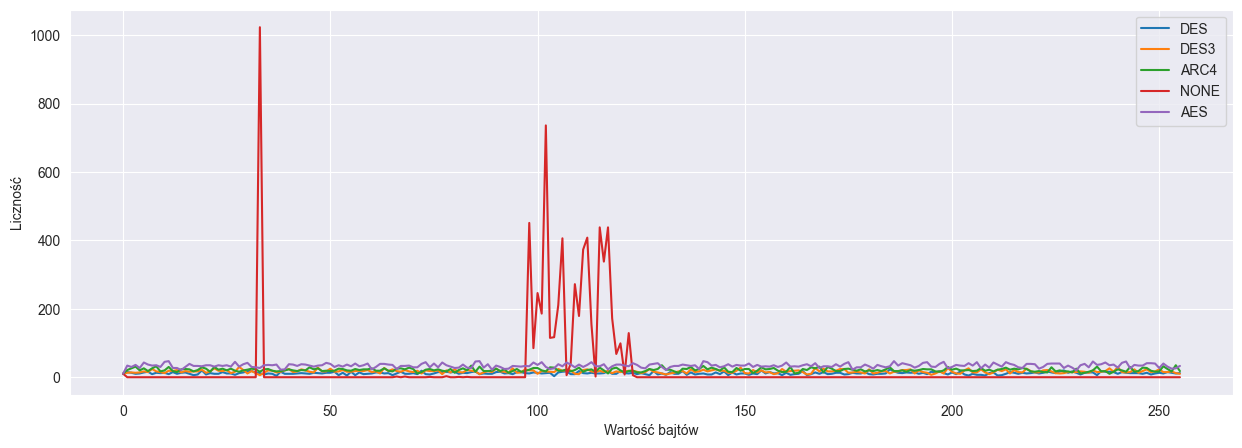

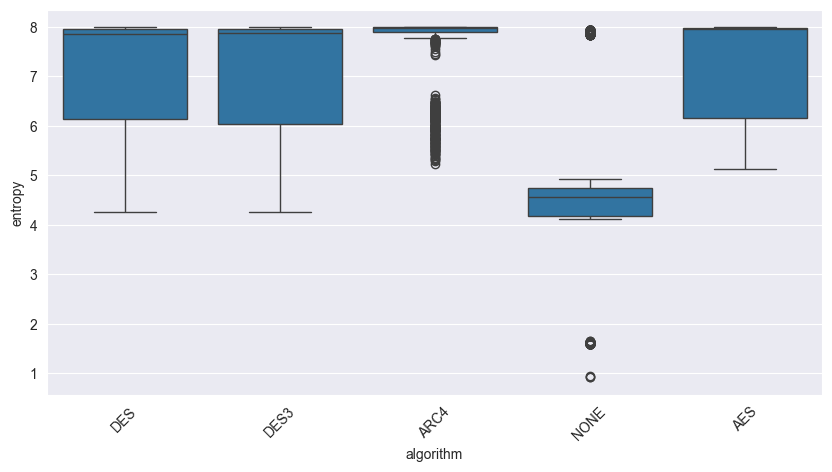

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_ecb_1000_1key["algorithm"].unique()):
    subset = df_ecb_1000_1key[df_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików (1000 plików na format, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_ecb_1000_1key["algorithm"], y=df_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików 1000 plików na format, jeden klucz szyfrujący")
plt.show()

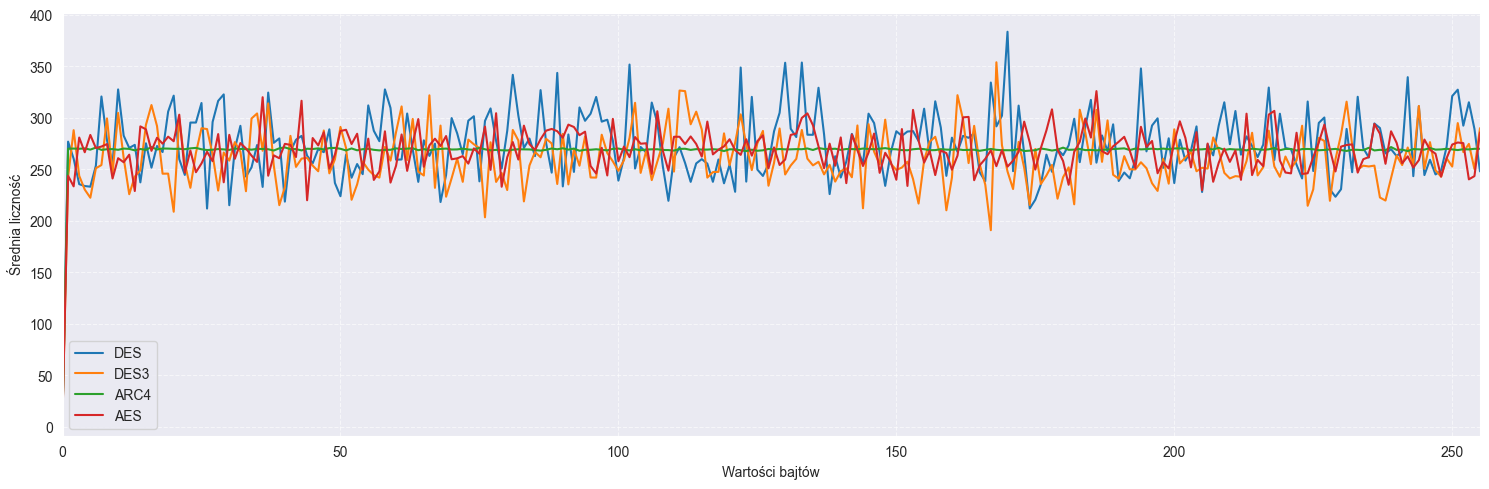

In [6]:
import matplotlib.pyplot as plt

algorithms = df_ecb_1000_1key["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_ecb_1000_1key[df_ecb_1000_1key["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Data frame with 1000 files *.bmp encrypted in ECB mode using 1 key - features


In [3]:
df_bmp_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1000_1key

file_name   format   entropy        mean     variance  \
0    image_0243.bmp.enc  bmp_ecb  4.695754  112.189231  4482.838275   
1    image_0253.bmp.enc  bmp_ecb  4.554507  122.883223  7169.611892   
2    image_0382.bmp.enc  bmp_ecb  4.775122  118.838552  3633.175594   
3    image_0392.bmp.enc  bmp_ecb  4.669875  113.977468  4364.535265   
4    image_0298.bmp.enc  bmp_ecb  4.579303  128.144795  4962.246578   
..                  ...      ...       ...         ...          ...   
995  image_0199.bmp.enc  bmp_ecb  5.592747  139.223475  5349.203191   
996  image_0093.bmp.enc  bmp_ecb  5.567402  128.637043  4657.599615   
997  image_0083.bmp.enc  bmp_ecb  5.713977  131.706408  4372.606110   
998  image_0152.bmp.enc  bmp_ecb  5.478039  133.388240  5747.262925   
999  image_0142.bmp.enc  bmp_ecb  5.576487  127.390243  5010.097894   

       std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0    66.954001  0.231552 -1.040523  25286443  11.541904  ...              1   
1    84.673561  0.256738 -1.331992  27075244   9.643314  ...              0   
2    60.275829 -0.171274 -1.009211   7118847  11.036967  ...              0   
3    66.064629  0.190866 -0.818985  10627727  10.551164  ...              0   
4    70.443215  0.217766 -1.232091  18868393  10.700385  ...              0   
..         ...       ...       ...       ...        ...  ...            ...   
995  73.138247 -0.326579 -1.036737   5365679   9.744106  ...              0   
996  68.246609  0.002650 -1.051097  34335749  11.765744  ...              0   
997  66.125684 -0.202381 -0.838732  16292185  10.064760  ...              1   
998  75.810705 -0.337174 -1.173827  17320923   9.961691  ...              0   
999  70.782045  0.056022 -1.172689  19748213  10.816274  ...              2   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0                0              0            127            251   
1                0            311          24258              2   
2                0              0             71              1   
3                0              2              0              1   
4                0            233              0              2   
..             ...            ...            ...            ...   
995             34           1130              1              0   
996              0              0              1              1   
997           3235              0              0            115   
998              0              0              1             60   
999              0           3438              0              0   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                1           7906              0              0        DES  
1            12130              0              1          11818        DES  
2                1              0              0              0        DES  
3                1              1              0              0        DES  
4                1              0              0              0        DES  
..             ...            ...            ...            ...        ...  
995              0              0              1              0        AES  
996              0              2              0           5167        AES  
997              0              1           3234              1        AES  
998              1              1             60              2        AES  
999              1            118              0              0        AES  

[1000 rows x 267 columns]

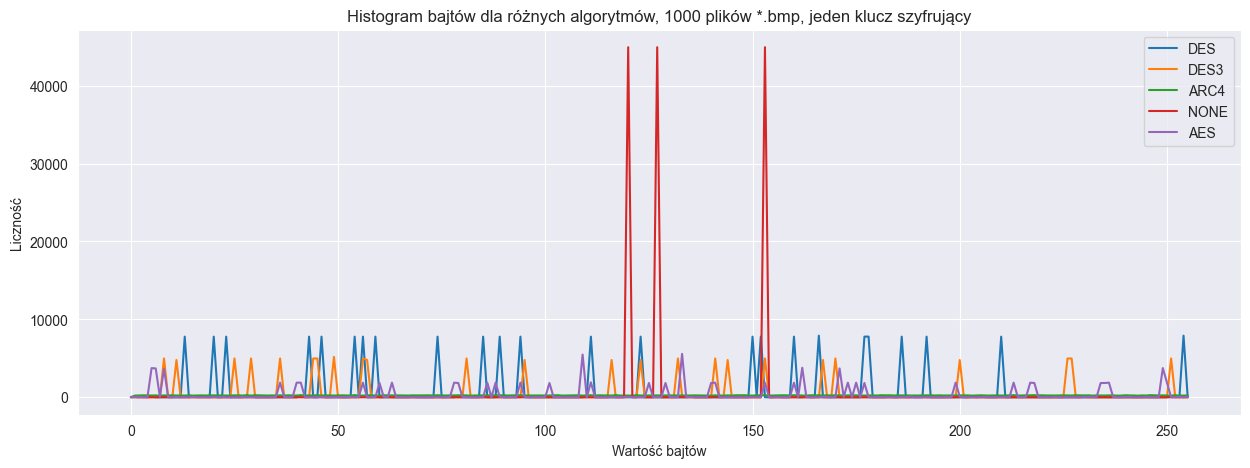

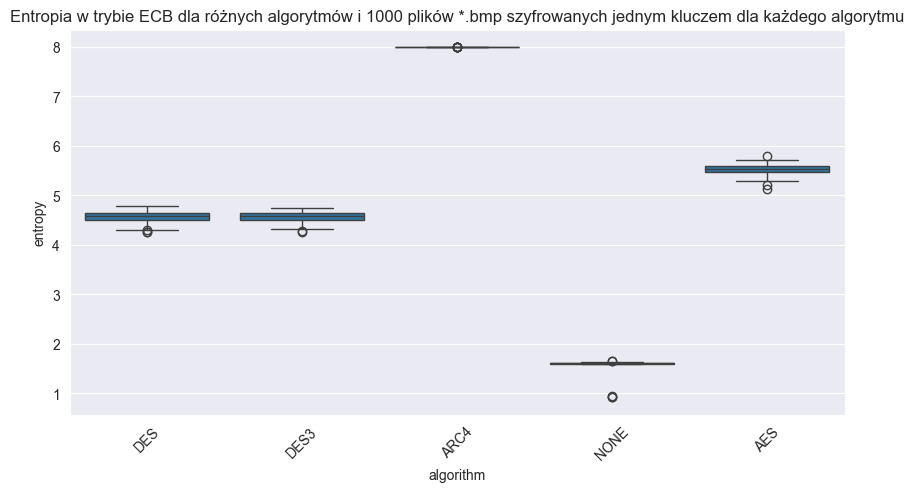

In [32]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1000_1key["algorithm"].unique()):
    subset = df_bmp_ecb_1000_1key[df_bmp_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1000_1key["algorithm"], y=df_bmp_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.bmp szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [4]:
df_csv_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_csv_ecb.csv'))
df_csv_ecb_1000_1key

file_name   format   entropy        mean     variance    std_dev  \
0    file0226.csv.enc  csv_ecb  6.597580  130.039062  5491.271912  74.103117   
1    file0236.csv.enc  csv_ecb  6.293296  137.208333  4952.310764  70.372656   
2    file0385.csv.enc  csv_ecb  6.425615  126.446429  6088.157844  78.026648   
3    file0395.csv.enc  csv_ecb  6.254886  125.454545  4884.407025  69.888533   
4    file0244.csv.enc  csv_ecb  5.919925  119.916667  5879.715278  76.679301   
..                ...      ...       ...         ...          ...        ...   
995  file0145.csv.enc  csv_ecb  6.436732  132.285714  5108.900510  71.476573   
996  file0094.csv.enc  csv_ecb  6.376420  121.321429  5018.628827  70.842281   
997  file0084.csv.enc  csv_ecb  6.418875  123.241071  5430.647242  73.692925   
998  file0137.csv.enc  csv_ecb  6.486137  125.218750  5811.499023  76.233188   
999  file0127.csv.enc  csv_ecb  6.405395  128.008929  5403.598135  73.509170   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0    0.028017 -1.178758   14775  10.743821  ...              1              2   
1   -0.029000 -1.085790   11242  10.821468  ...              0              0   
2    0.023645 -1.359261   12192  10.433463  ...              0              1   
3   -0.017256 -1.056967    9534  10.408694  ...              1              0   
4    0.236814 -1.244748    7436  10.162567  ...              1              0   
..        ...       ...     ...        ...  ...            ...            ...   
995 -0.004991 -1.073301   12078  10.384570  ...              0              0   
996  0.114409 -0.955089   11818  10.272189  ...              0              0   
997 -0.061945 -1.122681   10705   9.776521  ...              0              1   
998  0.099788 -1.248866   13470  10.258381  ...              0              0   
999 -0.144289 -1.122881   11283  10.036985  ...              0              2   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0                0              0              0              1   
1                1              0              0              2   
2                0              0              1              0   
3                0              1              0              0   
4                0              1              1              0   
..             ...            ...            ...            ...   
995              0              1              0              0   
996              0              2              2              0   
997              0              0              0              0   
998              0              1              0              0   
999              0              1              0              0   

     histogram_253  histogram_254  histogram_255  algorithm  
0                2              1              1        DES  
1                1              1              0        DES  
2                0              0              2        DES  
3                0              0              0        DES  
4                0              0              0        DES  
..             ...            ...            ...        ...  
995              0              0              0        AES  
996              0              2              0        AES  
997              0              0              0        AES  
998              1              1              0        AES  
999              0              0              0        AES  

[1000 rows x 267 columns]

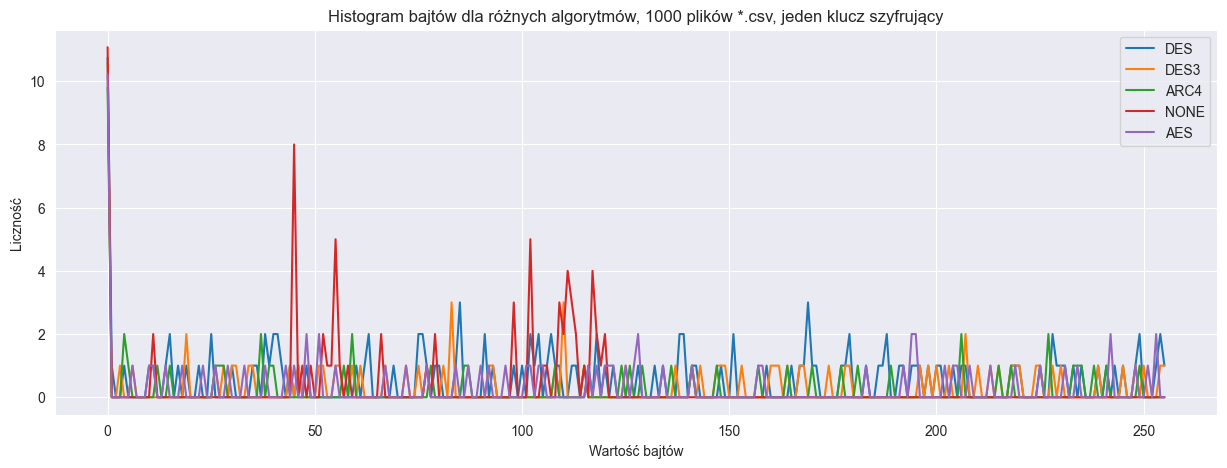

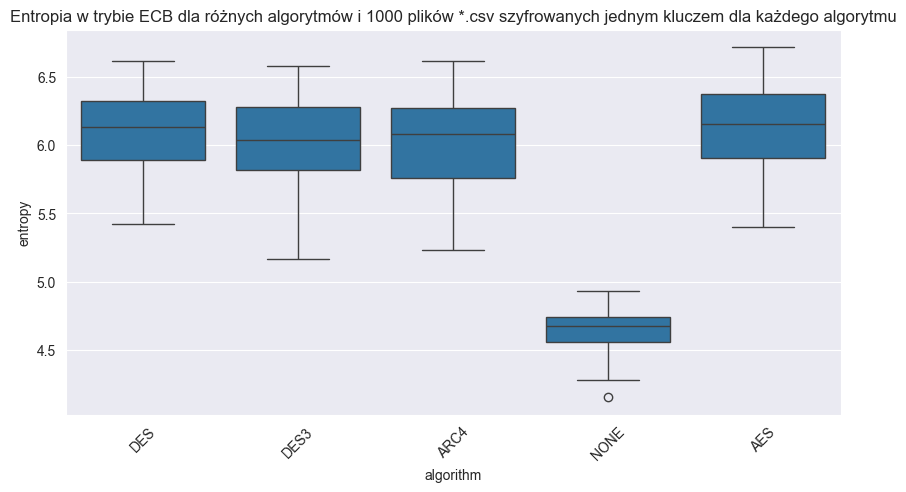

In [34]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1000_1key["algorithm"].unique()):
    subset = df_csv_ecb_1000_1key[df_csv_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1000_1key["algorithm"], y=df_csv_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.csv szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [5]:
df_html_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_html_ecb.csv'))
df_html_ecb_1000_1key

file_name    format   entropy        mean     variance  \
0    file0320.html.enc  html_ecb  7.961268  126.595669  5516.451374   
1    file0321.html.enc  html_ecb  7.964903  126.248817  5490.430861   
2    file0228.html.enc  html_ecb  7.959697  126.637326  5462.693847   
3    file0229.html.enc  html_ecb  7.940806  125.965542  5513.906370   
4    file0369.html.enc  html_ecb  7.970974  126.636221  5472.412233   
..                 ...       ...       ...         ...          ...   
995  file0154.html.enc  html_ecb  7.981407  127.629622  5412.285008   
996  file0122.html.enc  html_ecb  7.971460  127.238252  5452.887315   
997  file0123.html.enc  html_ecb  7.938808  125.883929  5557.961726   
998  file0063.html.enc  html_ecb  7.955752  125.726691  5392.194001   
999  file0062.html.enc  html_ecb  7.974066  126.207938  5471.588574   

       std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0    74.272817  0.028289 -1.208704   763666  10.230793  ...             32   
1    74.097442  0.022375 -1.221097   797409  10.237769  ...             25   
2    73.910039 -0.001096 -1.188031   658397  10.200247  ...             32   
3    74.255682  0.030669 -1.192127   435423  10.172269  ...             24   
4    73.975754  0.027869 -1.209868  1020323  10.343933  ...             52   
..         ...       ...       ...      ...        ...  ...            ...   
995  73.568234 -0.015718 -1.190541  1102176  10.302512  ...             31   
996  73.843668  0.009367 -1.204137   681689  10.333482  ...             24   
997  74.551739  0.033313 -1.229742   314193  10.193125  ...              8   
998  73.431560  0.037385 -1.215672   408261  10.226194  ...             11   
999  73.970187  0.021497 -1.205229   719578  10.323399  ...             20   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0               48             40             24             21   
1               43             42             24             28   
2               19             34             22             21   
3               29             19             10             14   
4               48             40             32             34   
..             ...            ...            ...            ...   
995             37             31             45             38   
996             17             36             31             25   
997             13             15             14              9   
998             12              9             12             16   
999             33             31             25             31   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               18             34             26             33        DES  
1               24             33             27             25        DES  
2               25             26             22             29        DES  
3               19             13             14             12        DES  
4               27             31             47             37        DES  
..             ...            ...            ...            ...        ...  
995             39             29             39             48        AES  
996             32             26             21             14        AES  
997             10              8             15             15        AES  
998             17             18             13             11        AES  
999             28             31             37             26        AES  

[1000 rows x 267 columns]

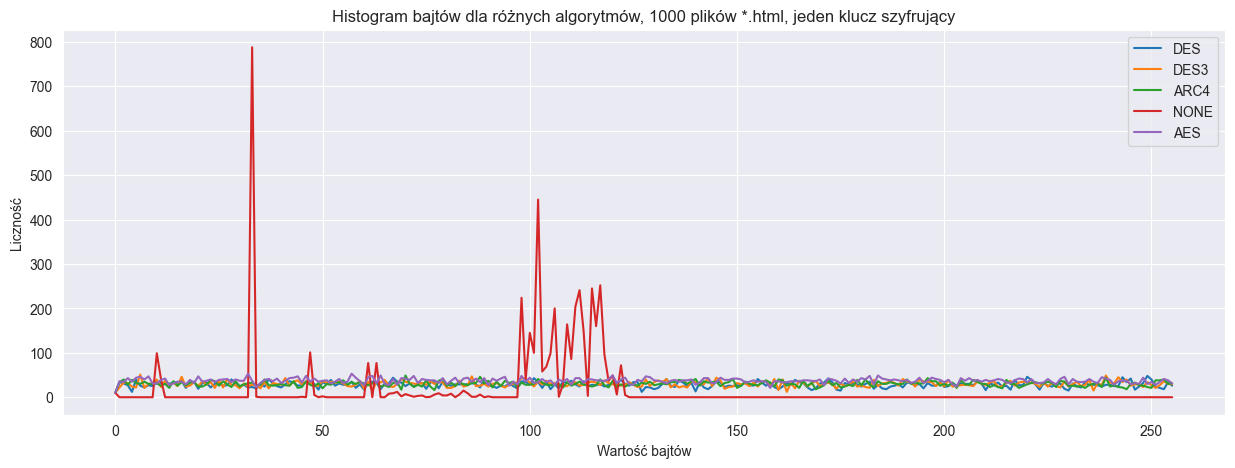

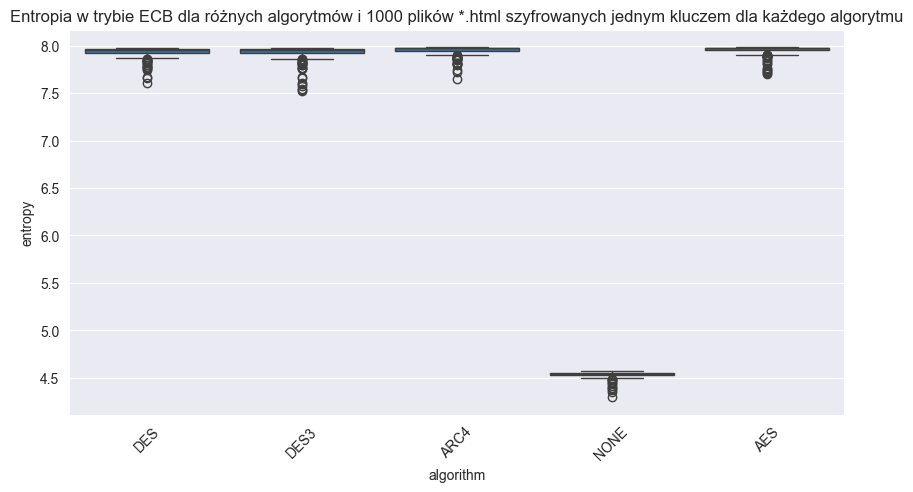

In [36]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1000_1key["algorithm"].unique()):
    subset = df_html_ecb_1000_1key[df_html_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1000_1key["algorithm"], y=df_html_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.html szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [6]:
df_pyth_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1000_1key

file_name    format   entropy        mean     variance    std_dev  \
0    file0380.py.enc  pyth_ecb  7.493894  124.818627  5513.878869  74.255497   
1    file0280.py.enc  pyth_ecb  7.825513  125.518559  5701.982188  75.511471   
2    file0292.py.enc  pyth_ecb  7.847567  123.678458  5569.287632  74.627660   
3    file0392.py.enc  pyth_ecb  7.855940  125.865702  5611.462129  74.909693   
4    file0302.py.enc  pyth_ecb  7.831022  123.036062  5477.044080  74.007054   
..               ...       ...       ...         ...          ...        ...   
995  file0075.py.enc  pyth_ecb  7.976695  126.804343  5433.542212  73.712565   
996  file0108.py.enc  pyth_ecb  7.954591  125.862028  5637.503369  75.083310   
997  file0008.py.enc  pyth_ecb  7.977910  127.721298  5501.473559  74.171919   
998  file0116.py.enc  pyth_ecb  7.921248  130.183482  5516.916781  74.275950   
999  file0016.py.enc  pyth_ecb  7.925033  126.566176  5467.145947  73.940151   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0    0.088771 -1.194453   41952  10.140194  ...              1              3   
1    0.110438 -1.257994  191712  10.229677  ...             10              8   
2    0.130825 -1.180502  664473  10.266693  ...             20             28   
3    0.099993 -1.208695  999336  10.160570  ...             41             35   
4    0.144660 -1.182213  519516  10.259162  ...             12             18   
..        ...       ...     ...        ...  ...            ...            ...   
995  0.008609 -1.206537  873285  10.235266  ...             21             32   
996  0.033298 -1.246408  448219  10.281635  ...             16             15   
997  0.010265 -1.210246  783022  10.247880  ...             23             40   
998 -0.014989 -1.222522  245181  10.462113  ...             11              7   
999  0.007336 -1.186451  255294  10.212089  ...              6              7   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0                2              0              4              0   
1               13              6              7             13   
2               77             26             13             54   
3              135             37             35             80   
4               43             16             19             39   
..             ...            ...            ...            ...   
995             28             33             22             33   
996             20             18             15             21   
997             24             29             27             35   
998              6             15             11              8   
999              9             17              8              8   

     histogram_253  histogram_254  histogram_255  algorithm  
0                7              0              3        DES  
1               10              5              8        DES  
2               20             19             20        DES  
3               34             39             24        DES  
4               21             12             12        DES  
..             ...            ...            ...        ...  
995             37             30             36        AES  
996             17             13             22        AES  
997             30             28             37        AES  
998              9              7             15        AES  
999             12              8             12        AES  

[1000 rows x 267 columns]

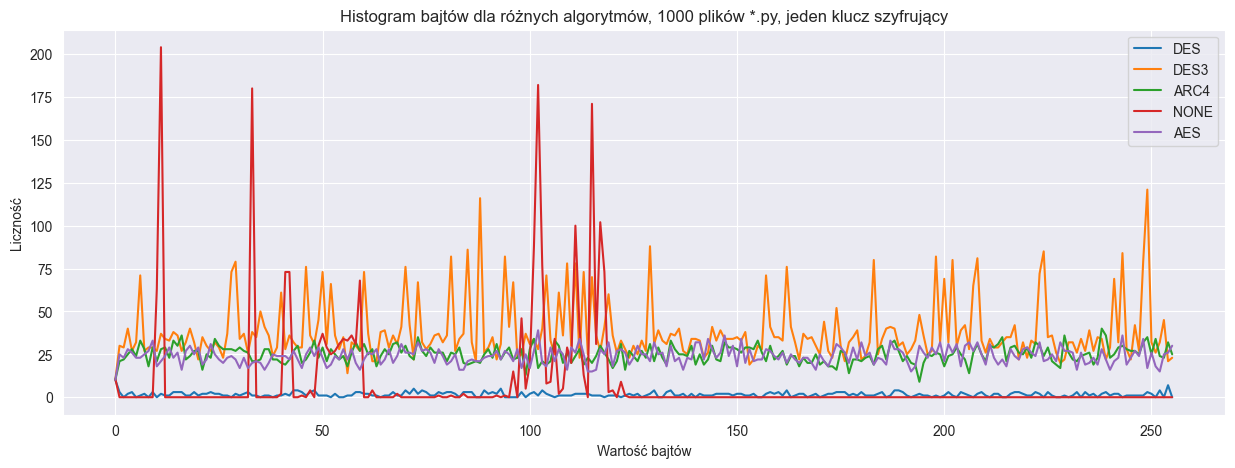

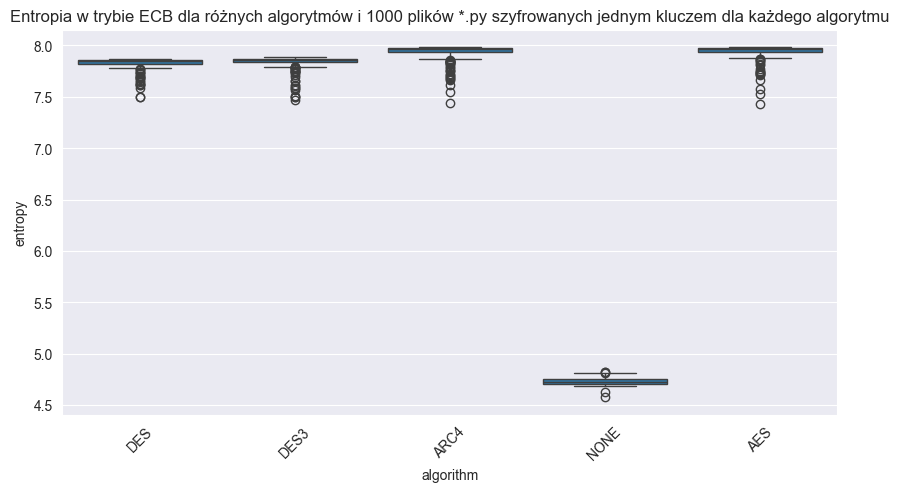

In [77]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1000_1key["algorithm"].unique()):
    subset = df_pyth_ecb_1000_1key[df_pyth_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1000_1key["algorithm"], y=df_pyth_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.py szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [7]:
df_txt_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_txt_ecb.csv'))
df_txt_ecb_1000_1key

file_name   format   entropy        mean     variance    std_dev  \
0    file0298.txt.enc  txt_ecb  7.941436  128.264842  5560.453276  74.568447   
1    file0288.txt.enc  txt_ecb  7.973139  128.691301  5460.519735  73.895330   
2    file0221.txt.enc  txt_ecb  7.975520  127.344546  5554.037296  74.525414   
3    file0359.txt.enc  txt_ecb  7.970208  127.216202  5464.742489  73.923897   
4    file0231.txt.enc  txt_ecb  7.917245  128.059629  5262.741586  72.544756   
..                ...      ...       ...         ...          ...        ...   
995  file0048.txt.enc  txt_ecb  7.864546  127.725446  5435.160483  73.723541   
996  file0120.txt.enc  txt_ecb  7.806664  128.524590  5387.159231  73.397270   
997  file0058.txt.enc  txt_ecb  7.928286  129.231786  5436.048061  73.729560   
998  file0189.txt.enc  txt_ecb  7.957862  126.184457  5479.481893  74.023523   
999  file0199.txt.enc  txt_ecb  7.966433  128.593028  5491.689778  74.105936   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0   -0.000422 -1.215835  318579  10.250475  ...              8             11   
1   -0.007466 -1.191889  853285  10.312206  ...             33             29   
2   -0.004480 -1.217304  768541  10.314416  ...             29             30   
3   -0.006931 -1.199113  616501  10.232529  ...             16             20   
4   -0.033794 -1.158340  239975  10.295437  ...              6              8   
..        ...       ...     ...        ...  ...            ...            ...   
995  0.017488 -1.183415  142333  10.290895  ...              5              3   
996 -0.014823 -1.192320  103576  10.301599  ...              3              5   
997 -0.042155 -1.185760  290911  10.192977  ...              9             10   
998  0.009538 -1.204535  452316  10.289763  ...             18             14   
999 -0.014151 -1.210328  507785  10.234311  ...             19             17   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0               13             11             15             13   
1               38             47             38             40   
2               29             27             29             27   
3               35             20             17             22   
4                7             12             13             11   
..             ...            ...            ...            ...   
995              7              3              4              5   
996              2              6              5              4   
997             14              7             15             16   
998             18             13             16             18   
999             28             21             17             18   

     histogram_253  histogram_254  histogram_255  algorithm  
0               11             12             13        DES  
1               32             37             32        DES  
2               22             41             22        DES  
3               24             26             23        DES  
4                8              7              5        DES  
..             ...            ...            ...        ...  
995              6              5              8        AES  
996              6              5              1        AES  
997             10             13             11        AES  
998             18             12             17        AES  
999             31             21             17        AES  

[1000 rows x 267 columns]

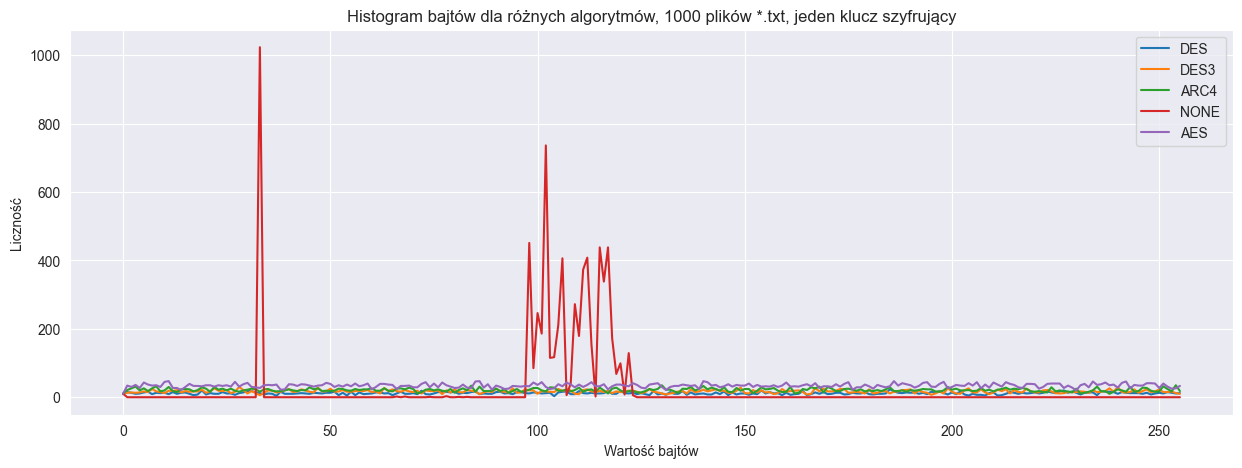

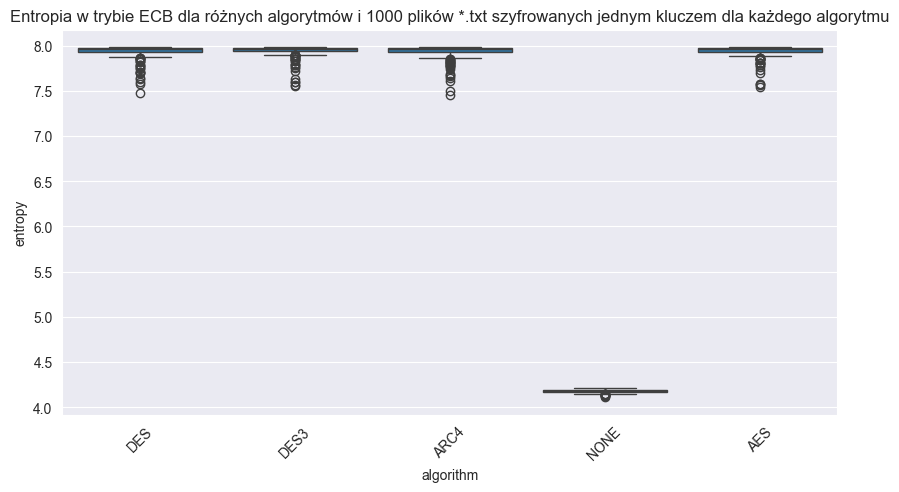

In [40]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1000_1key["algorithm"].unique()):
    subset = df_txt_ecb_1000_1key[df_txt_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, jeden klucz szyfrujący")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1000_1key["algorithm"], y=df_txt_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.txt szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

In [8]:
df_wav_ecb_1000_1key = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_1key_csv/features_wav_ecb.csv'))
df_wav_ecb_1000_1key

file_name   format   entropy        mean     variance    std_dev  \
0    file0214.wav.enc  wav_ecb  7.997567  127.519345  5448.845083  73.816293   
1    file0204.wav.enc  wav_ecb  7.998047  127.712526  5465.805050  73.931083   
2    file0276.wav.enc  wav_ecb  7.998178  127.511613  5468.008835  73.945986   
3    file0266.wav.enc  wav_ecb  7.998109  127.613036  5475.061658  73.993660   
4    file0353.wav.enc  wav_ecb  7.998251  127.345288  5452.459497  73.840771   
..                ...      ...       ...         ...          ...        ...   
995  file0052.wav.enc  wav_ecb  7.998781  127.277609  5428.476591  73.678196   
996  file0167.wav.enc  wav_ecb  7.998922  127.377437  5451.659296  73.835353   
997  file0177.wav.enc  wav_ecb  7.998920  127.338987  5466.636527  73.936706   
998  file0105.wav.enc  wav_ecb  7.998811  127.646343  5450.573558  73.828000   
999  file0115.wav.enc  wav_ecb  7.999014  127.526286  5456.605275  73.868838   

     skewness  kurtosis    energy        rms  ...  histogram_247  \
0   -0.002929 -1.196937  37165752  10.263078  ...           1276   
1   -0.004463 -1.201668   9302265  10.266961  ...            361   
2   -0.001267 -1.202530  46358472  10.252308  ...           1775   
3   -0.005985 -1.203079  18594165  10.265497  ...            668   
4    0.001826 -1.198633   9329353  10.281899  ...            331   
..        ...       ...       ...        ...  ...            ...   
995  0.002713 -1.192006  27870067  10.261908  ...            998   
996  0.000613 -1.197409  18602320  10.267748  ...            675   
997  0.004464 -1.203746  27917539  10.270644  ...           1050   
998 -0.002871 -1.200297  18618376  10.272178  ...            713   
999  0.000044 -1.198279  37232527  10.272294  ...           1344   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0             1224           1209           1336           1536   
1              333            352            391            355   
2             1510           1814           1860           1700   
3              698            704            727            678   
4              326            378            343            344   
..             ...            ...            ...            ...   
995            975           1068            991           1014   
996            700            664            692            661   
997           1043           1039           1079            928   
998            671            691            702            636   
999           1412           1395           1419           1430   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0             1344           1432           1304           1420        DES  
1              335            306            341            337        DES  
2             1750           1711           1826           1690        DES  
3              732            704            724            696        DES  
4              325            338            322            340        DES  
..             ...            ...            ...            ...        ...  
995            981           1009           1022            972        AES  
996            711            693            675            682        AES  
997           1008           1071           1008           1048        AES  
998            685            700            699            730        AES  
999           1346           1272           1316           1398        AES  

[1000 rows x 267 columns]

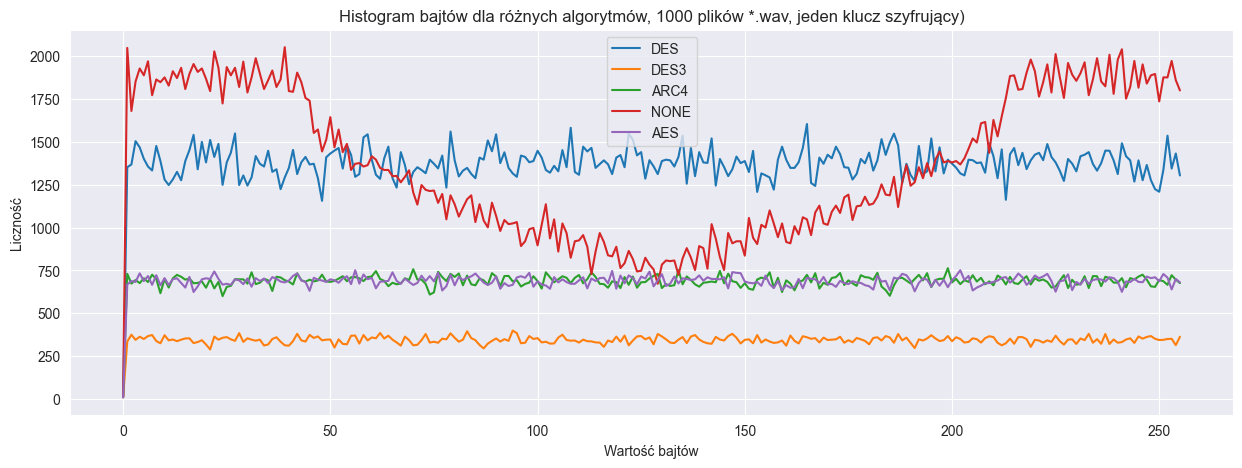

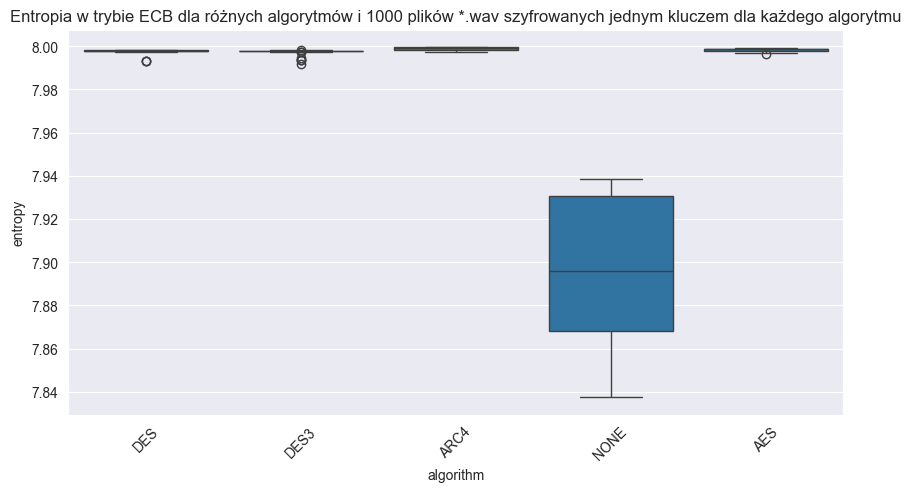

In [42]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1000_1key["algorithm"].unique()):
    subset = df_wav_ecb_1000_1key[df_wav_ecb_1000_1key["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, jeden klucz szyfrujący)")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1000_1key["algorithm"], y=df_wav_ecb_1000_1key["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.wav szyfrowanych jednym kluczem dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (3 keys per algorithm)

In [8]:
df_all_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_all.csv'))
df_all_ecb_1000_3keys

file_name    format   entropy        mean     variance  \
0      file0298.txt.enc   txt_ecb  7.940933  127.610488  5360.173149   
1      file0288.txt.enc   txt_ecb  7.976503  128.675474  5486.467464   
2      file0221.txt.enc   txt_ecb  7.977162  126.111019  5484.744042   
3      file0359.txt.enc   txt_ecb  7.968994  126.644192  5462.879345   
4      file0231.txt.enc   txt_ecb  7.908196  129.770318  5585.471098   
...                 ...       ...       ...         ...          ...   
5995  file0154.html.enc  html_ecb  7.985803  128.499422  5474.443374   
5996  file0122.html.enc  html_ecb  7.969448  128.542293  5485.397647   
5997  file0123.html.enc  html_ecb  7.935927  125.396825  5519.085916   
5998  file0063.html.enc  html_ecb  7.955287  129.381404  5493.679582   
5999  file0062.html.enc  html_ecb  7.970602  128.225118  5438.552698   

        std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0     73.213203 -0.003090 -1.201361   321881  10.303460  ...              7   
1     74.070692 -0.032627 -1.203523   862148  10.365624  ...             30   
2     74.059058  0.027944 -1.195996   768848  10.316476  ...             35   
3     73.911294  0.015035 -1.198214   621185  10.271328  ...             30   
4     74.736009 -0.042072 -1.211003   241722  10.332844  ...             12   
...         ...       ...       ...      ...        ...  ...            ...   
5995  73.989482 -0.012442 -1.208515  1103418  10.308315  ...             41   
5996  74.063470 -0.019441 -1.197604   672624  10.264546  ...             19   
5997  74.290551  0.012731 -1.206622   323392  10.341267  ...             12   
5998  74.119360 -0.017936 -1.217595   411575  10.267615  ...             18   
5999  73.746544 -0.012423 -1.191119   711466  10.265045  ...             38   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                13             10              7              9   
1                38             26             35             27   
2                30             36             31             26   
3                26             15             19             24   
4                11              8             12              7   
...             ...            ...            ...            ...   
5995             41             40             38             41   
5996             20             16             25             23   
5997             10             13             13              3   
5998             15             14             16             18   
5999             27             27             26             21   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                14              9             12             11        DES  
1                27             29             21             34        DES  
2                29             25             30             24        DES  
3                15             28             24             24        DES  
4                 1              4             20              7        DES  
...             ...            ...            ...            ...        ...  
5995             52             43             41             51        AES  
5996             19             30             29             26        AES  
5997              7             10             12              9        AES  
5998             13             24             14             13        AES  
5999             34             29             20             27        AES  

[6000 rows x 267 columns]

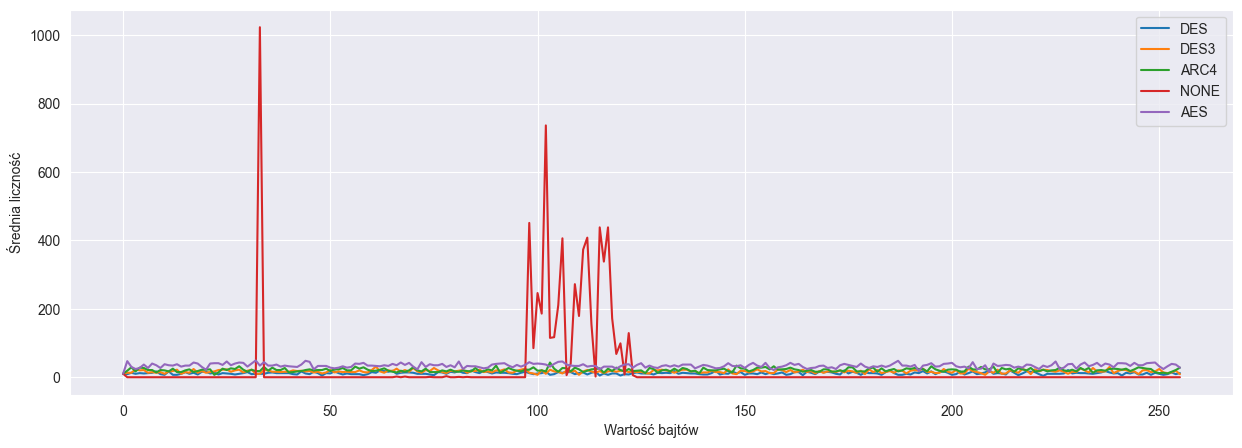

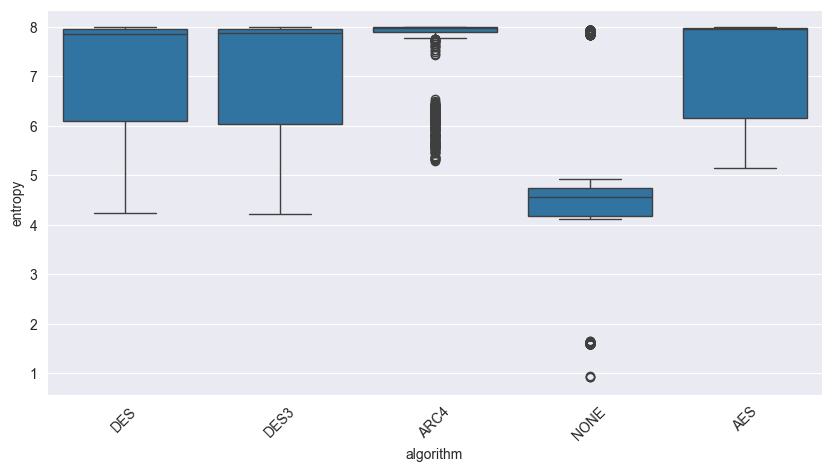

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_ecb_1000_3keys["algorithm"].unique()):
    subset = df_all_ecb_1000_3keys[df_all_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
#plt.title("Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Średnia liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_ecb_1000_3keys["algorithm"], y=df_all_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
#plt.title("Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, trzy klucze szyfrujące na algorytm")
plt.show()

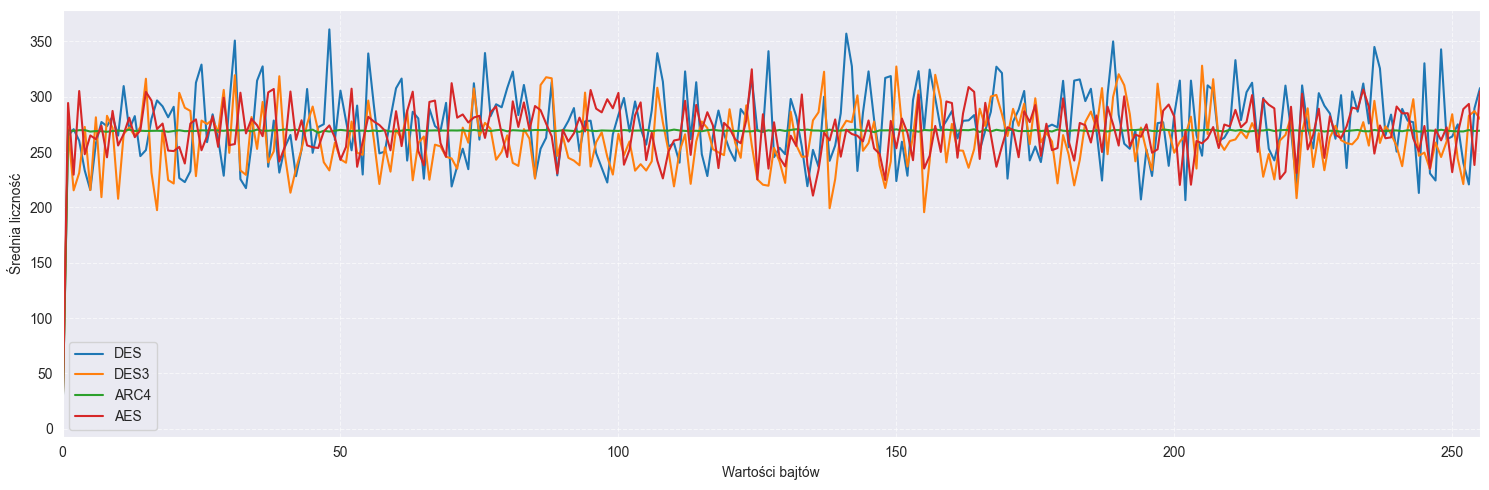

In [10]:
import matplotlib.pyplot as plt

algorithms = df_all_ecb_1000_3keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_ecb_1000_3keys[df_all_ecb_1000_3keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
df_bmp_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1000_3keys

file_name   format   entropy        mean     variance  \
0    image_0243.bmp.enc  bmp_ecb  4.609731  111.000063  5928.754604   
1    image_0253.bmp.enc  bmp_ecb  4.554634  121.861454  4396.150119   
2    image_0382.bmp.enc  bmp_ecb  4.775076  130.882067  7483.070041   
3    image_0392.bmp.enc  bmp_ecb  4.588039  122.619092  5823.970272   
4    image_0298.bmp.enc  bmp_ecb  4.484917  112.322491  4095.631666   
..                  ...      ...       ...         ...          ...   
995  image_0199.bmp.enc  bmp_ecb  5.552089  119.439287  6501.892548   
996  image_0093.bmp.enc  bmp_ecb  5.553407  130.790374  5350.122479   
997  image_0083.bmp.enc  bmp_ecb  5.593078  138.243621  5005.684419   
998  image_0152.bmp.enc  bmp_ecb  5.496357  140.560827  5612.301553   
999  image_0142.bmp.enc  bmp_ecb  5.464123  132.418780  5976.329185   

       std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0    76.998407  0.222396 -1.242485  28314660  12.213476  ...              0   
1    66.303470  0.053287 -1.183656  31249000  10.359962  ...              0   
2    86.504740 -0.044607 -1.567710   5531330   9.728809  ...           2432   
3    76.314941  0.037947 -1.234640   9883163  10.174854  ...              1   
4    63.997122  0.297786 -0.848199  17835224  10.403302  ...              0   
..         ...       ...       ...       ...        ...  ...            ...   
995  80.634314  0.164373 -1.285374   5369503   9.747578  ...             34   
996  73.144531  0.012850 -1.118579  28923586  10.798718  ...              0   
997  70.750862 -0.054036 -1.155604  19009950  10.871870  ...              1   
998  74.915296 -0.219204 -1.152767  19208677  10.490502  ...           7170   
999  77.306721 -0.105143 -1.250493  14074818   9.131354  ...              0   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0             7781              1              0              0   
1                0              0              0              0   
2                0             69              0              0   
3                0              1              1              0   
4                0              0              0           6786   
..             ...            ...            ...            ...   
995              0              0             34             68   
996              0              0              0          10046   
997              1              0              0              1   
998              0             60              0           3555   
999              0           3436              0            119   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                0              0              0              0        DES  
1                1              0              1              0        DES  
2                1           2363              2              1        DES  
3                1           3916              0              0        DES  
4                1              0              1              1        DES  
..             ...            ...            ...            ...        ...  
995           1132              0           2261           1130        AES  
996              1              0              0              1        AES  
997              0              0              0           6470        AES  
998              0              0           3614              0        AES  
999              0              0              1              0        AES  

[1000 rows x 267 columns]

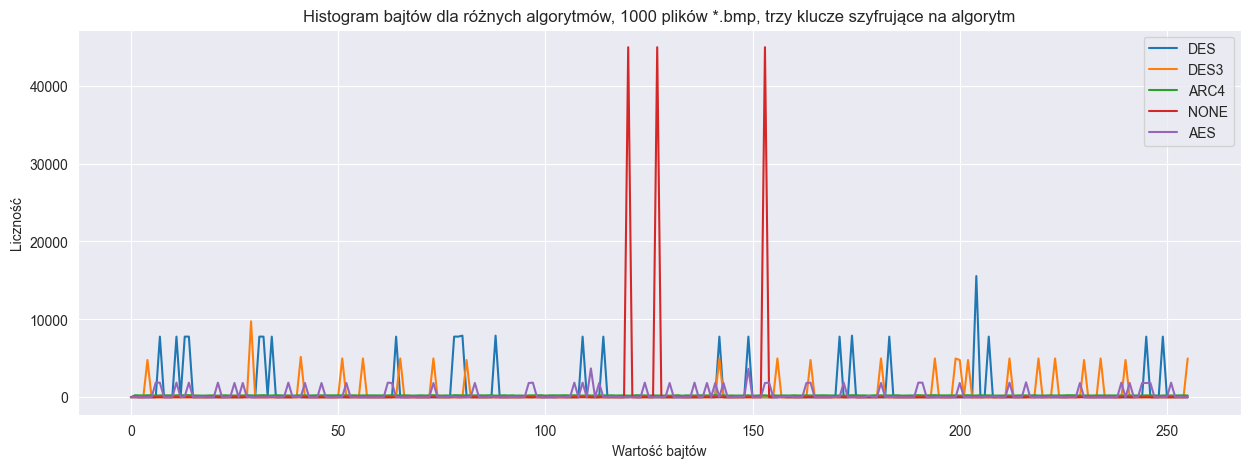

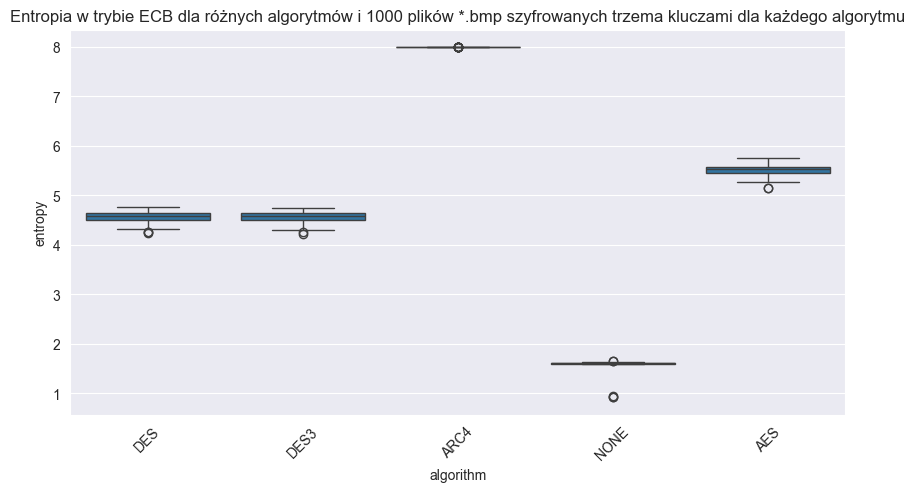

In [46]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1000_3keys["algorithm"].unique()):
    subset = df_bmp_ecb_1000_3keys[df_bmp_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1000_3keys["algorithm"], y=df_bmp_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.bmp szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [11]:
df_csv_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_csv_ecb.csv'))
df_csv_ecb_1000_3keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0226.csv.enc  csv_ecb  6.566330  138.773438  6114.518982  78.195390   
1    file0236.csv.enc  csv_ecb  6.293296  114.260417  5457.880100  73.877467   
2    file0385.csv.enc  csv_ecb  6.340706  143.651786  5735.280533  75.731635   
3    file0395.csv.enc  csv_ecb  6.200853  123.909091  5892.855372  76.764936   
4    file0244.csv.enc  csv_ecb  5.992774  119.458333  5646.748264  75.144849   
..                ...      ...       ...         ...          ...        ...   
995  file0145.csv.enc  csv_ecb  6.539498  132.142857  5922.676020  76.958924   
996  file0094.csv.enc  csv_ecb  6.405395  124.348214  5810.476961  76.226485   
997  file0084.csv.enc  csv_ecb  6.479186  124.508929  4837.910635  69.555091   
998  file0137.csv.enc  csv_ecb  6.554535  132.742188  5283.128845  72.685135   
999  file0127.csv.enc  csv_ecb  6.354186  119.660714  5603.009885  74.853256   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0   -0.236292 -1.236496   11595   9.517664  ...              1              1   
1    0.189095 -1.155616    9599   9.999479  ...              0              0   
2   -0.308298 -1.188480   12637  10.622163  ...              1              0   
3    0.064931 -1.164582    8044   9.560810  ...              1              1   
4   -0.101318 -1.378560    6827   9.737528  ...              0              0   
..        ...       ...     ...        ...  ...            ...            ...   
995 -0.089552 -1.284006   12462  10.548358  ...              0              0   
996 -0.060209 -1.149663   10219   9.552019  ...              1              1   
997  0.079046 -1.044776   11755  10.244772  ...              1              1   
998 -0.115882 -1.181904   13775  10.373870  ...              1              1   
999  0.137200 -1.255344   12478  10.555127  ...              0              0   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0                1              0              0              1   
1                1              0              0              0   
2                0              0              0              0   
3                0              2              0              0   
4                0              0              0              1   
..             ...            ...            ...            ...   
995              0              1              1              0   
996              0              0              1              0   
997              0              1              0              0   
998              2              3              0              2   
999              2              0              0              1   

     histogram_253  histogram_254  histogram_255  algorithm  
0                1              0              2        DES  
1                0              1              0        DES  
2                1              2              1        DES  
3                0              1              1        DES  
4                0              0              0        DES  
..             ...            ...            ...        ...  
995              1              1              1        AES  
996              0              0              1        AES  
997              0              0              1        AES  
998              0              0              0        AES  
999              0              0              0        AES  

[1000 rows x 267 columns]

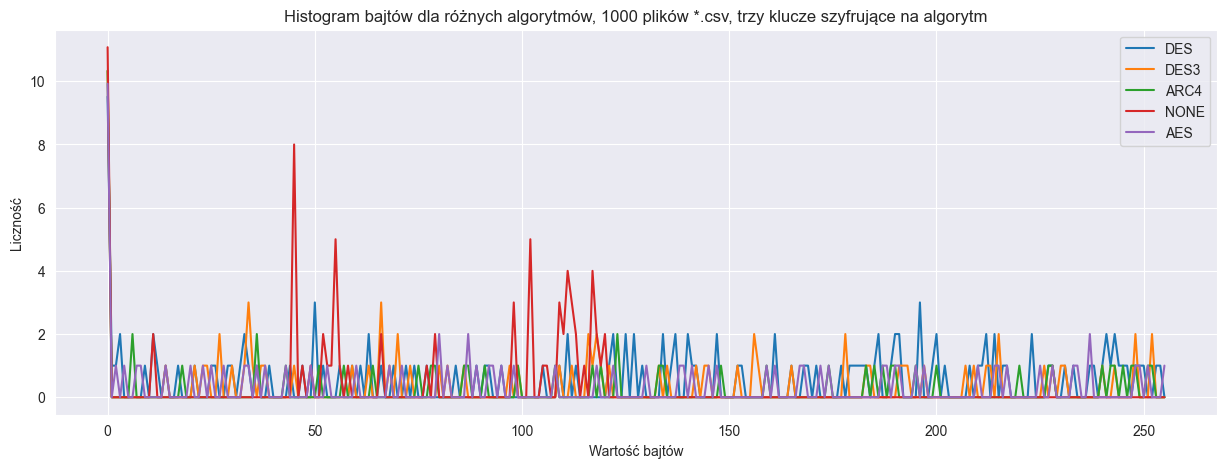

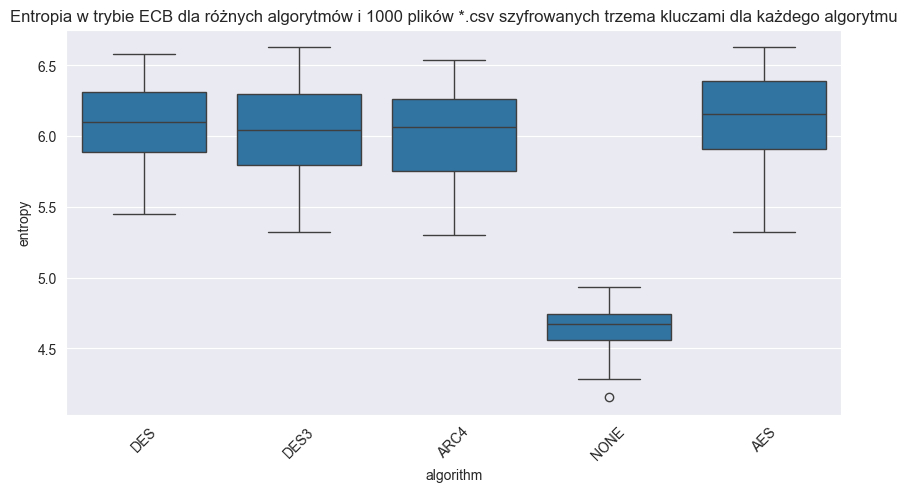

In [51]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1000_3keys["algorithm"].unique()):
    subset = df_csv_ecb_1000_3keys[df_csv_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1000_3keys["algorithm"], y=df_csv_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.csv szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [12]:
df_html_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_html_ecb.csv'))
df_html_ecb_1000_3keys

file_name    format   entropy        mean     variance  \
0    file0320.html.enc  html_ecb  7.966851  128.654331  5495.331993   
1    file0321.html.enc  html_ecb  7.962780  128.927050  5534.630719   
2    file0228.html.enc  html_ecb  7.961148  128.597977  5493.759680   
3    file0229.html.enc  html_ecb  7.935005  128.974335  5480.610558   
4    file0369.html.enc  html_ecb  7.966016  127.190227  5495.321406   
..                 ...       ...       ...         ...          ...   
995  file0154.html.enc  html_ecb  7.985803  128.499422  5474.443374   
996  file0122.html.enc  html_ecb  7.969448  128.542293  5485.397647   
997  file0123.html.enc  html_ecb  7.935927  125.396825  5519.085916   
998  file0063.html.enc  html_ecb  7.955287  129.381404  5493.679582   
999  file0062.html.enc  html_ecb  7.970602  128.225118  5438.552698   

       std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0    74.130506 -0.027169 -1.217236   774954  10.306128  ...             30   
1    74.395099 -0.041836 -1.202162   791769  10.201499  ...             34   
2    74.119901 -0.027864 -1.205372   666550  10.263208  ...             22   
3    74.031146 -0.011303 -1.209479   448036  10.318548  ...             20   
4    74.130435  0.014120 -1.210789   995878  10.219272  ...             40   
..         ...       ...       ...      ...        ...  ...            ...   
995  73.989482 -0.012442 -1.208515  1103418  10.308315  ...             41   
996  74.063470 -0.019441 -1.197604   672624  10.264546  ...             19   
997  74.290551  0.012731 -1.206622   323392  10.341267  ...             12   
998  74.119360 -0.017936 -1.217595   411575  10.267615  ...             18   
999  73.746544 -0.012423 -1.191119   711466  10.265045  ...             38   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0               33             27             21             28   
1               27             29             39             29   
2               22             42             34             19   
3               22             23             12             16   
4               31             50             41             32   
..             ...            ...            ...            ...   
995             41             40             38             41   
996             20             16             25             23   
997             10             13             13              3   
998             15             14             16             18   
999             27             27             26             21   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               37             26             25             17        DES  
1               34             30             39             30        DES  
2               21             27             17             23        DES  
3               20             18             20             20        DES  
4               45             32             32             37        DES  
..             ...            ...            ...            ...        ...  
995             52             43             41             51        AES  
996             19             30             29             26        AES  
997              7             10             12              9        AES  
998             13             24             14             13        AES  
999             34             29             20             27        AES  

[1000 rows x 267 columns]

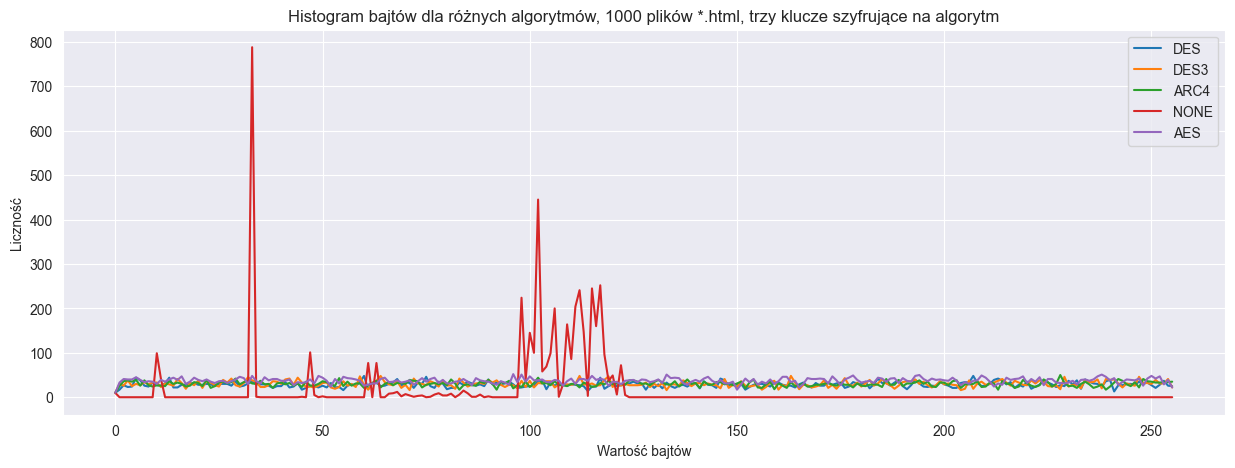

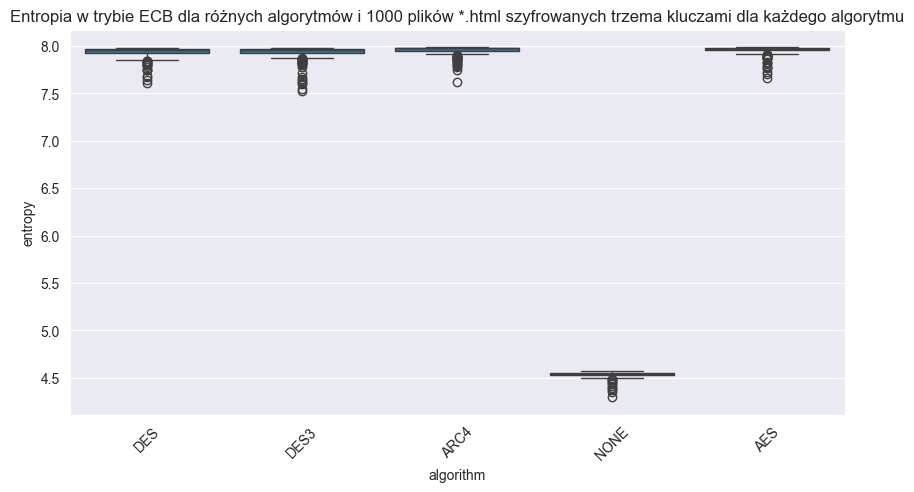

In [53]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1000_3keys["algorithm"].unique()):
    subset = df_html_ecb_1000_3keys[df_html_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1000_3keys["algorithm"], y=df_html_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.html szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [13]:
df_pyth_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1000_3keys

file_name    format   entropy        mean     variance    std_dev  \
0    file0380.py.enc  pyth_ecb  7.457992  128.370098  5378.198812  73.336204   
1    file0280.py.enc  pyth_ecb  7.824556  130.788755  5523.755048  74.321969   
2    file0292.py.enc  pyth_ecb  7.847929  127.663388  5577.862581  74.685089   
3    file0392.py.enc  pyth_ecb  7.861524  123.964360  5414.571560  73.583772   
4    file0302.py.enc  pyth_ecb  7.836588  124.138169  5302.518187  72.818392   
..               ...       ...       ...         ...          ...        ...   
995  file0075.py.enc  pyth_ecb  7.974528  127.160988  5416.205609  73.594875   
996  file0108.py.enc  pyth_ecb  7.948345  128.047170  5527.442586  74.346773   
997  file0008.py.enc  pyth_ecb  7.976006  128.459630  5463.143757  73.913082   
998  file0116.py.enc  pyth_ecb  7.906452  128.776786  5642.391247  75.115852   
999  file0016.py.enc  pyth_ecb  7.936414  127.336601  5375.419379  73.317252   

     skewness  kurtosis   energy        rms  ...  histogram_247  \
0    0.028224 -1.132619    44217  10.410331  ...              4   
1   -0.074596 -1.233555   198919  10.420184  ...              5   
2   -0.004817 -1.219951   674984  10.347576  ...             14   
3    0.038342 -1.163477  1028945  10.309994  ...             25   
4    0.039258 -1.128182   514748  10.211975  ...              7   
..        ...       ...      ...        ...  ...            ...   
995 -0.004117 -1.202254   881950  10.285920  ...             26   
996 -0.029020 -1.218402   458062  10.393916  ...             13   
997 -0.013727 -1.202601   791095  10.300573  ...             28   
998 -0.017167 -1.226734   232244  10.182355  ...              3   
999 -0.036001 -1.193920   257704  10.260177  ...             13   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0                2              1              2              3   
1               11              4              7              4   
2               12             14             19             17   
3               30             38             37             28   
4               18             31             18             22   
..             ...            ...            ...            ...   
995             32             26             32             31   
996             17             19             13             18   
997             29             22             25             29   
998             10              8             22              8   
999              7              7              8              8   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                3              1              1              0        DES  
1                3             16              6              8        DES  
2               23             82             23             22        DES  
3               35             34             28             29        DES  
4               20             21             13             11        DES  
..             ...            ...            ...            ...        ...  
995             29             26             32             28        AES  
996             13             19             21             10        AES  
997             32             33             23             31        AES  
998             12              8              9              7        AES  
999             10              9              7              8        AES  

[1000 rows x 267 columns]

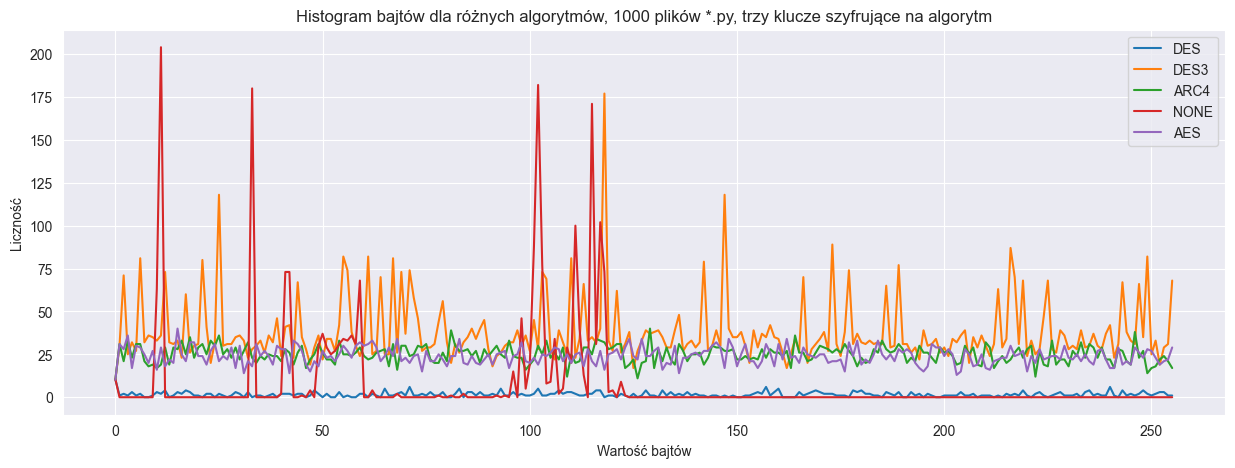

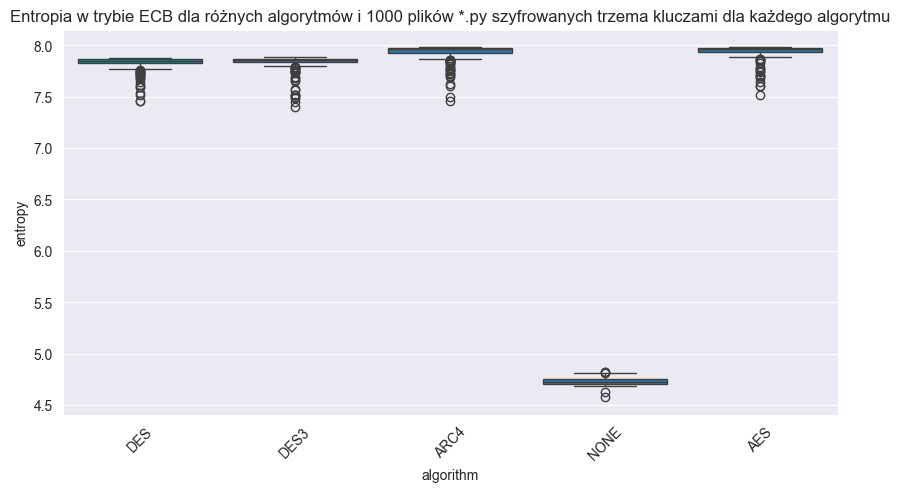

In [76]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1000_3keys["algorithm"].unique()):
    subset = df_pyth_ecb_1000_3keys[df_pyth_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1000_3keys["algorithm"], y=df_pyth_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.py szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [14]:
df_txt_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_txt_ecb.csv'))
df_txt_ecb_1000_3keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0298.txt.enc  txt_ecb  7.940933  127.610488  5360.173149  73.213203   
1    file0288.txt.enc  txt_ecb  7.976503  128.675474  5486.467464  74.070692   
2    file0221.txt.enc  txt_ecb  7.977162  126.111019  5484.744042  74.059058   
3    file0359.txt.enc  txt_ecb  7.968994  126.644192  5462.879345  73.911294   
4    file0231.txt.enc  txt_ecb  7.908196  129.770318  5585.471098  74.736009   
..                ...      ...       ...         ...          ...        ...   
995  file0048.txt.enc  txt_ecb  7.884700  127.473214  5583.664461  74.723922   
996  file0120.txt.enc  txt_ecb  7.805999  127.106557  5461.046023  73.898891   
997  file0058.txt.enc  txt_ecb  7.922850  126.009643  5452.680264  73.842266   
998  file0189.txt.enc  txt_ecb  7.952376  128.427903  5508.036937  74.216150   
999  file0199.txt.enc  txt_ecb  7.963299  126.573226  5551.307757  74.507099   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0   -0.003090 -1.201361  321881  10.303460  ...              7             13   
1   -0.032627 -1.203523  862148  10.365624  ...             30             38   
2    0.027944 -1.195996  768848  10.316476  ...             35             30   
3    0.015035 -1.198214  621185  10.271328  ...             30             26   
4   -0.042072 -1.211003  241722  10.332844  ...             12             11   
..        ...       ...     ...        ...  ...            ...            ...   
995  0.014856 -1.224181  145586  10.407830  ...              4              4   
996 -0.042111 -1.215934  100680  10.156561  ...              7              4   
997  0.025681 -1.198312  295173  10.267372  ...             14             11   
998 -0.022183 -1.228295  459116  10.366821  ...             12             18   
999  0.008762 -1.220012  508529  10.241806  ...             19             20   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0               10              7              9             14   
1               26             35             27             27   
2               36             31             26             29   
3               15             19             24             15   
4                8             12              7              1   
..             ...            ...            ...            ...   
995             10              6              2              6   
996              6              2              3              1   
997              9             17              9             11   
998             21             16             20             10   
999             12             20             22             11   

     histogram_253  histogram_254  histogram_255  algorithm  
0                9             12             11        DES  
1               29             21             34        DES  
2               25             30             24        DES  
3               28             24             24        DES  
4                4             20              7        DES  
..             ...            ...            ...        ...  
995              8              5              4        AES  
996              4              2              3        AES  
997             10             19             15        AES  
998             22             12             21        AES  
999             27             17             20        AES  

[1000 rows x 267 columns]

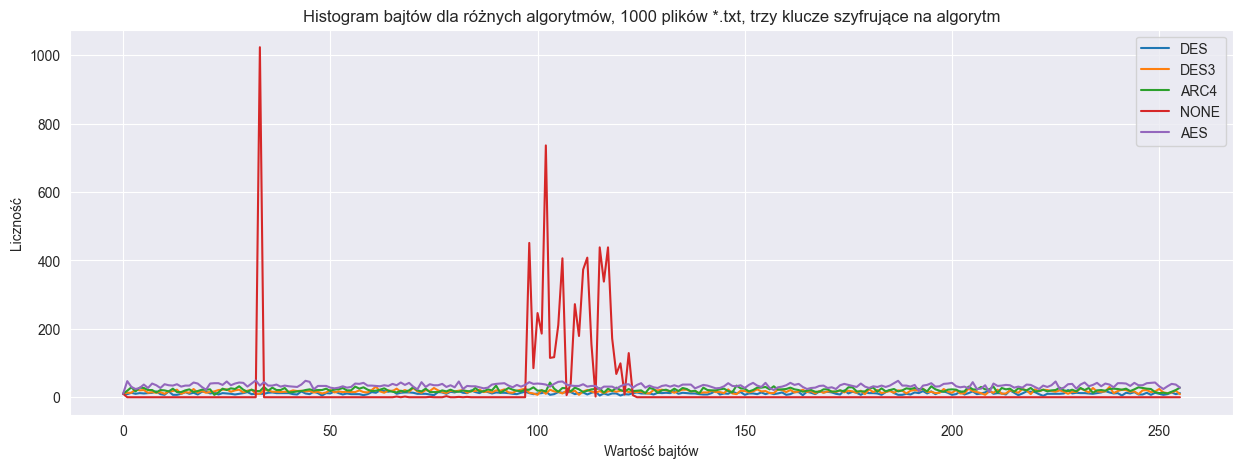

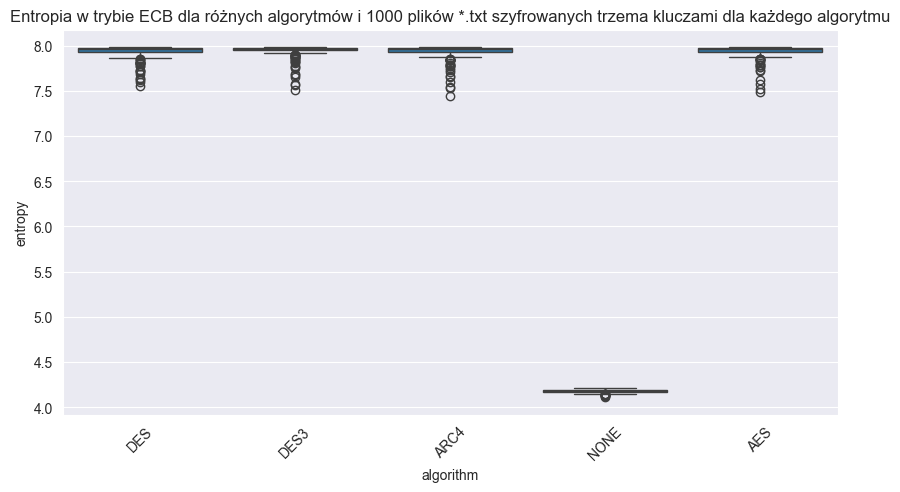

In [57]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1000_3keys["algorithm"].unique()):
    subset = df_txt_ecb_1000_3keys[df_txt_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1000_3keys["algorithm"], y=df_txt_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.txt szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

In [15]:
df_wav_ecb_1000_3keys = pd.DataFrame(pd.read_csv('../features_ecb/features_ecb_1000/features_ecb_1000_3keys_csv/features_wav_ecb.csv'))
df_wav_ecb_1000_3keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0214.wav.enc  wav_ecb  7.997893  127.861844  5447.951433  73.810239   
1    file0204.wav.enc  wav_ecb  7.998063  127.738204  5476.900720  74.006086   
2    file0276.wav.enc  wav_ecb  7.998040  127.457864  5453.109047  73.845169   
3    file0266.wav.enc  wav_ecb  7.997792  127.680807  5470.421120  73.962295   
4    file0353.wav.enc  wav_ecb  7.998186  127.308426  5455.063970  73.858405   
..                ...      ...       ...         ...          ...        ...   
995  file0052.wav.enc  wav_ecb  7.998882  127.761475  5461.811550  73.904070   
996  file0167.wav.enc  wav_ecb  7.998956  127.251196  5445.313811  73.792370   
997  file0177.wav.enc  wav_ecb  7.998920  127.735819  5463.517269  73.915609   
998  file0105.wav.enc  wav_ecb  7.998879  127.481377  5453.509650  73.847882   
999  file0115.wav.enc  wav_ecb  7.998909  127.538716  5488.856037  74.086814   

     skewness  kurtosis    energy        rms  ...  histogram_247  \
0   -0.007025 -1.198881  37328862  10.285574  ...           1428   
1   -0.001501 -1.201057   9267967  10.248016  ...            351   
2   -0.001096 -1.197656  46732596  10.293594  ...           1620   
3    0.002172 -1.203063  18736123  10.304608  ...            716   
4   -0.000316 -1.197951   9316276  10.274690  ...            322   
..        ...       ...       ...        ...  ...            ...   
995 -0.002217 -1.198187  27902175  10.267818  ...           1041   
996  0.005296 -1.198273  18635267  10.276836  ...            711   
997 -0.005471 -1.200441  27959449  10.278351  ...           1088   
998 -0.001110 -1.196411  18570218  10.258884  ...            710   
999  0.000050 -1.204540  37161771  10.262528  ...           1327   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0             1452           1420           1348           1369   
1              388            364            327            368   
2             1555           1721           1820           1695   
3              747            749            680            722   
4              327            310            346            339   
..             ...            ...            ...            ...   
995           1090           1038           1038           1086   
996            684            696            668            643   
997           1036           1021           1004           1056   
998            686            694            713            623   
999           1372           1370           1367           1356   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0             1196           1332           1380           1376        DES  
1              352            360            356            335        DES  
2             1850           1704           1746           1760        DES  
3              688            683            640            668        DES  
4              348            377            342            365        DES  
..             ...            ...            ...            ...        ...  
995           1109           1094            983           1039        AES  
996            670            703            703            655        AES  
997           1009           1004            973           1024        AES  
998            716            695            657            724        AES  
999           1387           1406           1424           1561        AES  

[1000 rows x 267 columns]

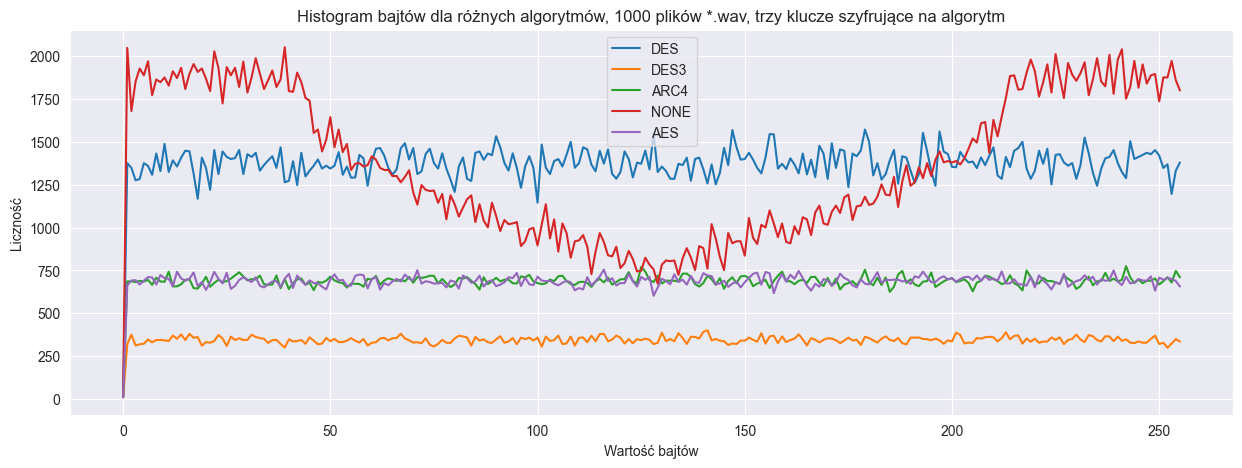

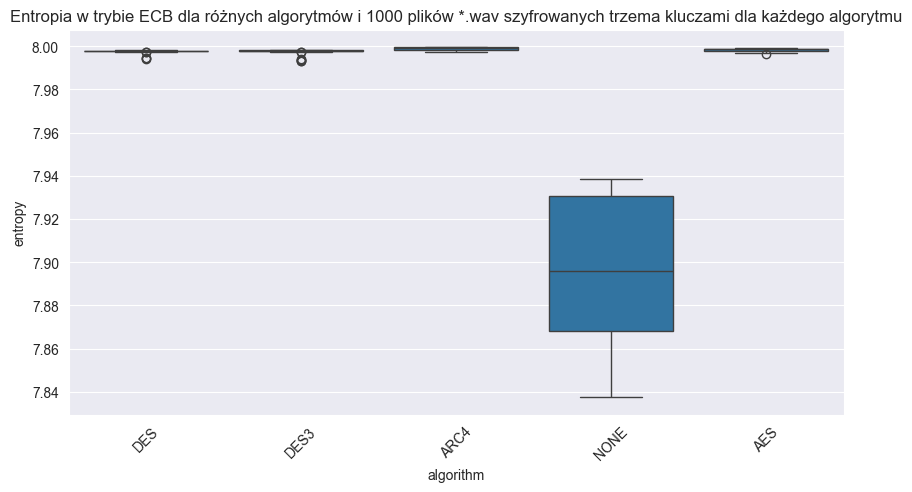

In [59]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1000_3keys["algorithm"].unique()):
    subset = df_wav_ecb_1000_3keys[df_wav_ecb_1000_3keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, trzy klucze szyfrujące na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1000_3keys["algorithm"], y=df_wav_ecb_1000_3keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.wav szyfrowanych trzema kluczami dla każdego algorytmu")
plt.show()

Diagrams for 1000 files per format in ECB mode (6 keys per algorithm)

In [2]:
import pandas as pd

df_all_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_all.csv'))
df_all_ecb_1000_6keys


file_name    format   entropy        mean     variance  \
0      file0298.txt.enc   txt_ecb  7.938249  125.651055  5532.370982   
1      file0288.txt.enc   txt_ecb  7.977318  127.158898  5382.482852   
2      file0221.txt.enc   txt_ecb  7.973329  126.214839  5485.258661   
3      file0359.txt.enc   txt_ecb  7.968524  127.645380  5596.918742   
4      file0231.txt.enc   txt_ecb  7.923853  126.997350  5483.316247   
...                 ...       ...       ...         ...          ...   
5995  file0154.html.enc  html_ecb  7.980599  127.227562  5449.807904   
5996  file0122.html.enc  html_ecb  7.975232  127.117638  5574.990391   
5997  file0123.html.enc  html_ecb  7.942044  128.994378  5430.827019   
5998  file0063.html.enc  html_ecb  7.953697  127.901639  5333.266452   
5999  file0062.html.enc  html_ecb  7.970843  127.746742  5483.574782   

        std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0     74.379910  0.037181 -1.206967   314462  10.184026  ...              8   
1     73.365406  0.006538 -1.174507   844127  10.256718  ...             34   
2     74.062532  0.014028 -1.197820   763666  10.281651  ...             19   
3     74.812557  0.011897 -1.241909   620806  10.268194  ...             32   
4     74.049418 -0.032355 -1.227326   235768  10.204793  ...              6   
...         ...       ...       ...      ...        ...  ...            ...   
5995  73.822814  0.008930 -1.208537  1086217  10.227652  ...             43   
5996  74.665858  0.003036 -1.220415   671933  10.259272  ...             26   
5997  73.694145 -0.000780 -1.186196   313427  10.180692  ...             14   
5998  73.029216 -0.030033 -1.181412   411510  10.266804  ...             11   
5999  74.051163 -0.010176 -1.197417   716026  10.297888  ...             28   

      histogram_248  histogram_249  histogram_250  histogram_251  \
0                13             11             10              8   
1                28             28             19             29   
2                24             25             25             30   
3                24             26             26             21   
4                 7              9              5              6   
...             ...            ...            ...            ...   
5995             34             41             42             40   
5996             30             19             26             30   
5997             12             15             10             15   
5998             13             14             16             15   
5999             28             27             33             29   

      histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                13             22             10             12        DES  
1                26             35             30             41        DES  
2                28             30             30             35        DES  
3                25             28             24             26        DES  
4                12              9              3              7        DES  
...             ...            ...            ...            ...        ...  
5995             40             36             34             49        AES  
5996             30             29             22             28        AES  
5997             11             12              6             14        AES  
5998              8             10             17             12        AES  
5999             29             23             22             31        AES  

[6000 rows x 267 columns]

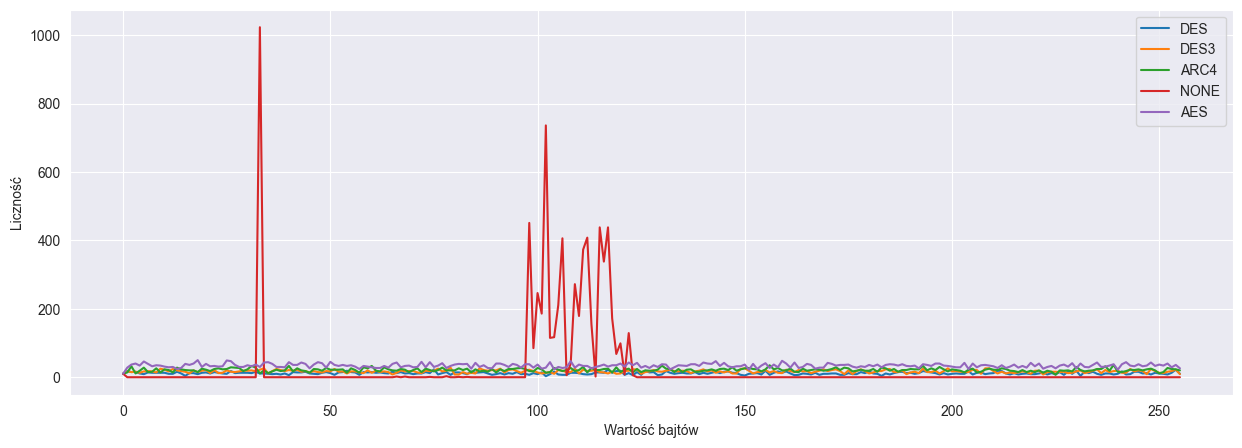

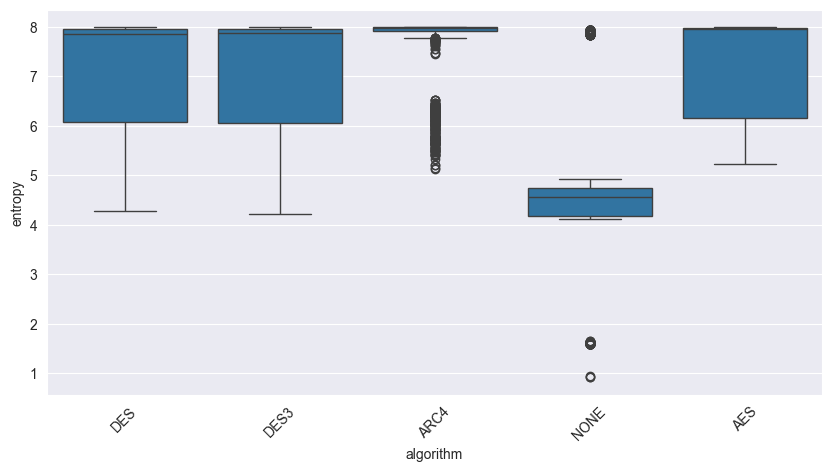

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_all_ecb_1000_6keys["algorithm"].unique()):
    subset = df_all_ecb_1000_6keys[df_all_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
#plt.title(
    #"Histogram bajtów dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność bajtów")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all_ecb_1000_6keys["algorithm"], y=df_all_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
#plt.title(
    #"Entropia w trybie ECB dla różnych algorytmów i wszystkich formatów plików, 1000 plików na format, sześć kluczy szyfrujących na algorytm")
plt.show()

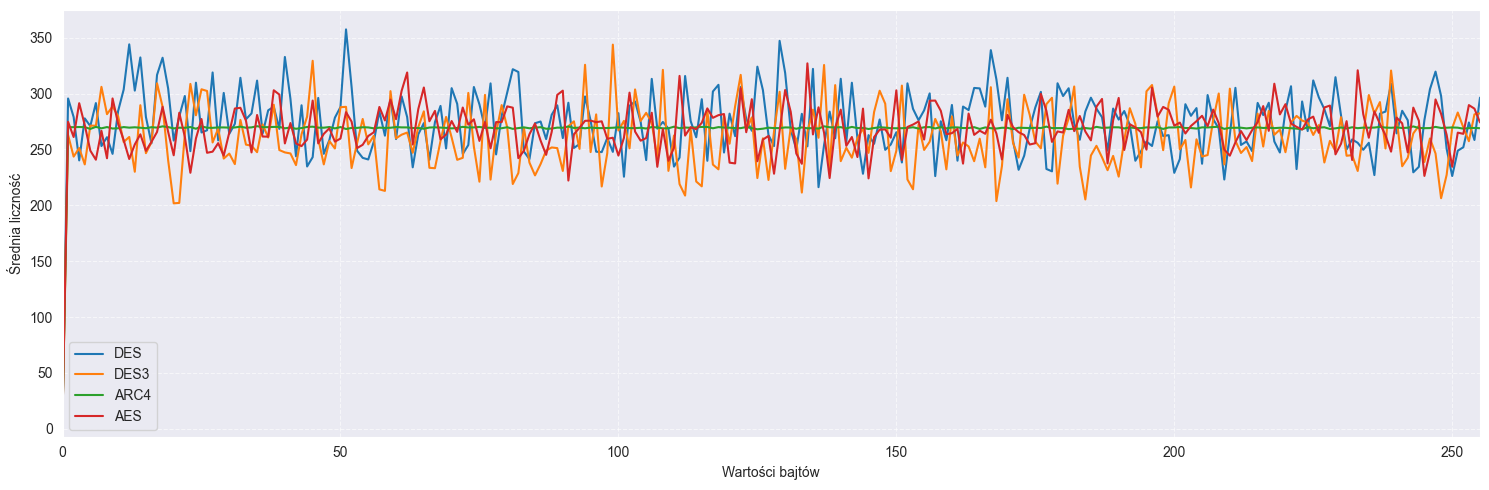

In [7]:
import matplotlib.pyplot as plt

algorithms = df_all_ecb_1000_6keys["algorithm"].unique()
algorithms = [algo for algo in algorithms if algo != "NONE"]

plt.figure(figsize=(15, 5))
for algo in algorithms:
    subset = df_all_ecb_1000_6keys[df_all_ecb_1000_6keys["algorithm"] == algo]
    avg_hist = subset.iloc[:, 9:265].mean()
    plt.plot(range(256), avg_hist, label=algo)
plt.xlim(0, 255)
plt.xlabel("Wartości bajtów")
plt.ylabel("Średnia liczność")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df_bmp_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_bmp_ecb.csv'))
df_bmp_ecb_1000_6keys

file_name   format   entropy        mean     variance  \
0    image_0243.bmp.enc  bmp_ecb  4.690320  114.640715  5798.362359   
1    image_0253.bmp.enc  bmp_ecb  4.562807  107.926149  5327.131739   
2    image_0382.bmp.enc  bmp_ecb  4.603175  127.115486  4344.298248   
3    image_0392.bmp.enc  bmp_ecb  4.598523  140.256201  4511.419591   
4    image_0298.bmp.enc  bmp_ecb  4.579162  138.460320  6603.802991   
..                  ...      ...       ...         ...          ...   
995  image_0199.bmp.enc  bmp_ecb  5.703002  140.300945  4536.797792   
996  image_0093.bmp.enc  bmp_ecb  5.630135  130.555203  5649.797196   
997  image_0083.bmp.enc  bmp_ecb  5.551966  115.768516  4285.404807   
998  image_0152.bmp.enc  bmp_ecb  5.558132  128.158585  5311.500701   
999  image_0142.bmp.enc  bmp_ecb  5.465856  119.812512  5443.970761   

       std_dev  skewness  kurtosis    energy        rms  ...  histogram_247  \
0    76.146979  0.339639 -1.052947  23356872  11.092794  ...              0   
1    72.987203  0.180244 -1.185149  28488040   9.891710  ...              0   
2    65.911291 -0.146386 -0.880323   6259311  10.349233  ...              1   
3    67.167102  0.004862 -1.331023   8808058   9.605506  ...              0   
4    81.263786 -0.069980 -1.438653  13535849   9.063057  ...              1   
..         ...       ...       ...       ...        ...  ...            ...   
995  67.355755 -0.387411 -0.897529   5640067   9.990145  ...              0   
996  75.165133  0.003716 -1.248894  24587546   9.956432  ...              0   
997  65.463003  0.118037 -0.869505  17307276  10.373567  ...              1   
998  72.880043 -0.013148 -1.021303  16043960   9.587455  ...              0   
999  73.783269  0.113658 -1.284613  21180518  11.201652  ...              0   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0              125              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0           3916   
4                0              0           6786              0   
..             ...            ...            ...            ...   
995              0              0              0              1   
996              0              0              1              0   
997           3349              0              1              2   
998              0              0              0              0   
999           6872              0              1              0   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                0              0              1              0        DES  
1                1              0              0              0        DES  
2                0              0              0              0        DES  
3                0              0              0              0        DES  
4                1              0          13572              0        DES  
..             ...            ...            ...            ...        ...  
995              0              1              2             34        AES  
996              0              0              1           5166        AES  
997              0              1              0              1        AES  
998             60              0            121           3555        AES  
999              0              0              0              2        AES  

[1000 rows x 267 columns]

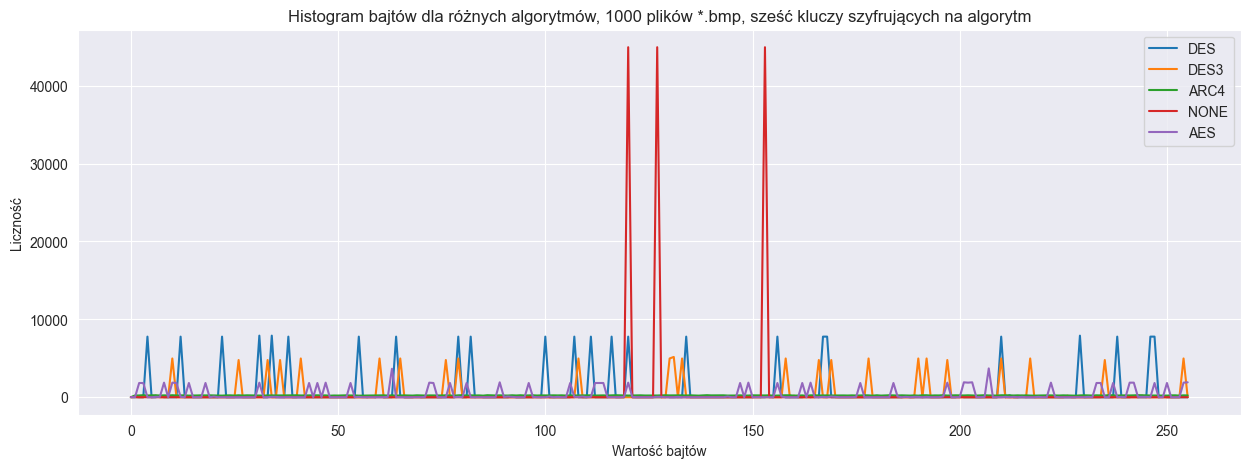

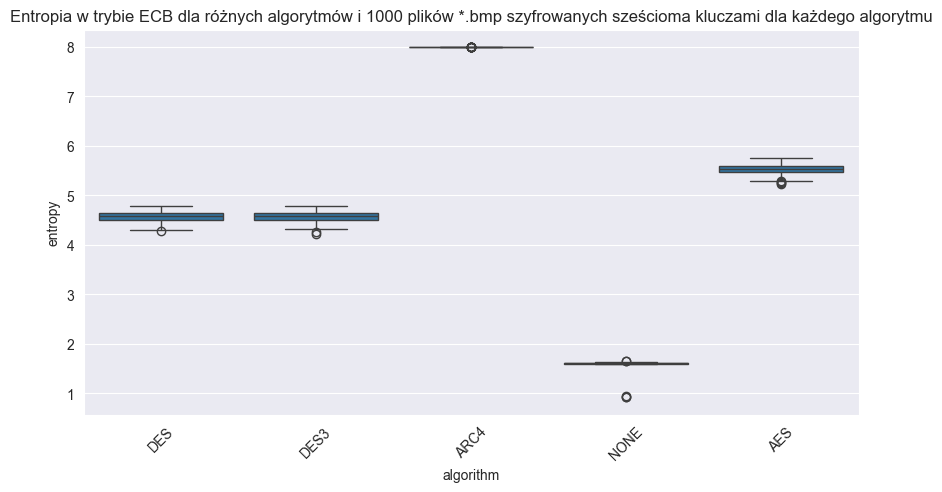

In [63]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_bmp_ecb_1000_6keys["algorithm"].unique()):
    subset = df_bmp_ecb_1000_6keys[df_bmp_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.bmp, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_bmp_ecb_1000_6keys["algorithm"], y=df_bmp_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.bmp szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [18]:
df_csv_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_csv_ecb.csv'))
df_csv_ecb_1000_6keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0226.csv.enc  csv_ecb  6.644455  136.921875  5016.103271  70.824454   
1    file0236.csv.enc  csv_ecb  6.173402  132.666667  6392.888889  79.955543   
2    file0385.csv.enc  csv_ecb  6.376420  132.044643  5394.971221  73.450468   
3    file0395.csv.enc  csv_ecb  6.246308  119.897727  5594.091813  74.793662   
4    file0244.csv.enc  csv_ecb  5.937218  120.055556  5346.330247  73.118604   
..                ...      ...       ...         ...          ...        ...   
995  file0145.csv.enc  csv_ecb  6.461329  132.928571  5610.369898  74.902402   
996  file0094.csv.enc  csv_ecb  6.432355  121.955357  5935.185507  77.040155   
997  file0084.csv.enc  csv_ecb  6.497043  127.205357  5378.038186  73.335109   
998  file0137.csv.enc  csv_ecb  6.422857  131.312500  5188.714844  72.032735   
999  file0127.csv.enc  csv_ecb  6.468069  133.910714  6149.259885  78.417217   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0   -0.178890 -1.191844   13786  10.378012  ...              0              0   
1   -0.058265 -1.331460    9088   9.729680  ...              0              0   
2   -0.116224 -1.126095   13173  10.845094  ...              0              1   
3    0.108115 -1.221767   10121  10.724335  ...              0              0   
4    0.050387 -1.267704    8296  10.734161  ...              0              0   
..        ...       ...     ...        ...  ...            ...            ...   
995 -0.049764 -1.196043   13098  10.814177  ...              0              1   
996  0.039538 -1.351938   12961  10.757472  ...              1              0   
997 -0.013503 -1.097490   10283   9.581884  ...              1              1   
998  0.038730 -1.018564   13784  10.377259  ...              0              1   
999 -0.075764 -1.351136   11926  10.319019  ...              0              2   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0                0              1              0              1   
1                1              0              0              0   
2                0              0              1              0   
3                0              1              1              0   
4                1              0              0              0   
..             ...            ...            ...            ...   
995              0              0              0              2   
996              0              0              1              0   
997              0              0              0              0   
998              0              1              0              0   
999              0              1              2              0   

     histogram_253  histogram_254  histogram_255  algorithm  
0                0              0              2        DES  
1                0              1              1        DES  
2                2              0              0        DES  
3                0              1              0        DES  
4                0              0              0        DES  
..             ...            ...            ...        ...  
995              2              1              0        AES  
996              0              0              0        AES  
997              1              0              0        AES  
998              1              2              1        AES  
999              2              0              0        AES  

[1000 rows x 267 columns]

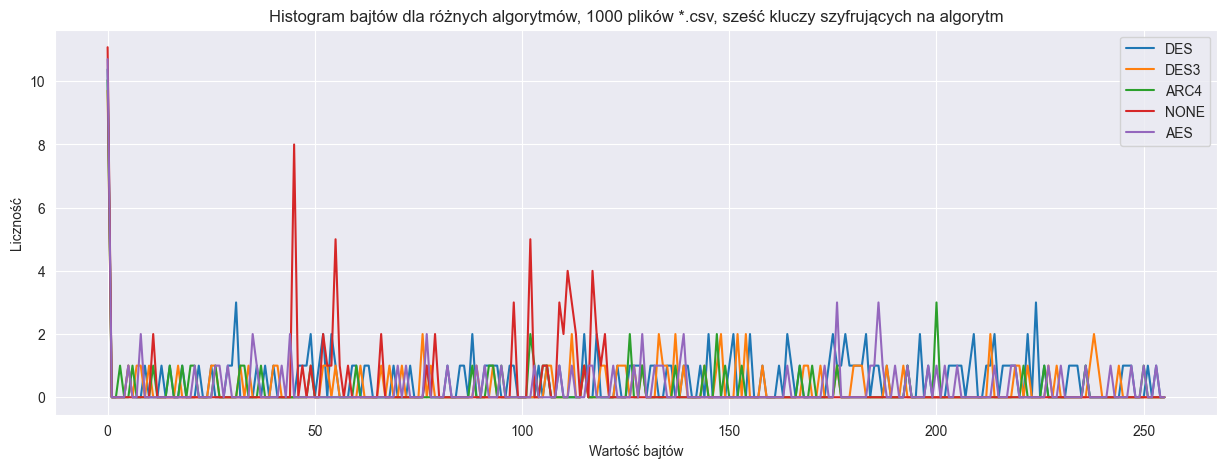

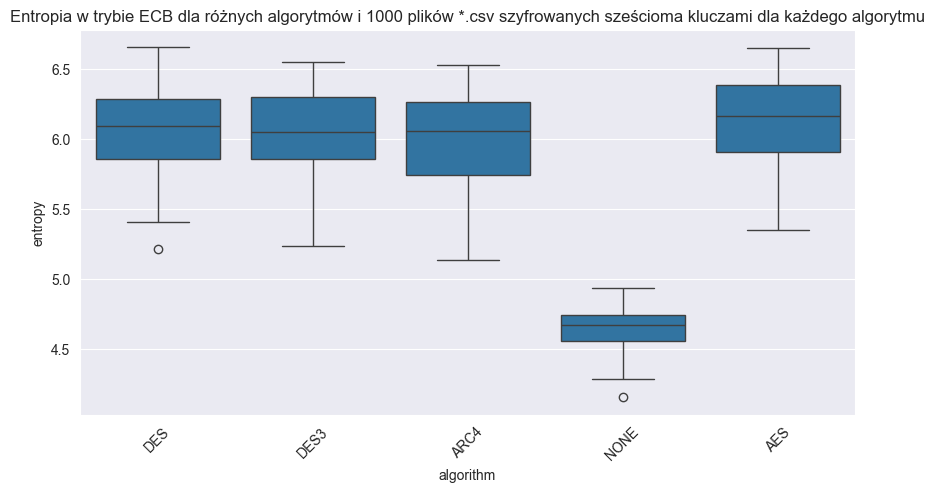

In [67]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_csv_ecb_1000_6keys["algorithm"].unique()):
    subset = df_csv_ecb_1000_6keys[df_csv_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.csv, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_csv_ecb_1000_6keys["algorithm"], y=df_csv_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.csv szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [19]:
df_html_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_html_ecb.csv'))
df_html_ecb_1000_6keys

file_name    format   entropy        mean     variance  \
0    file0320.html.enc  html_ecb  7.961672  126.794956  5511.721663   
1    file0321.html.enc  html_ecb  7.963464  128.350026  5464.466993   
2    file0228.html.enc  html_ecb  7.956156  126.636536  5459.578387   
3    file0229.html.enc  html_ecb  7.931550  128.398527  5390.235901   
4    file0369.html.enc  html_ecb  7.966113  128.688549  5386.438652   
..                 ...       ...       ...         ...          ...   
995  file0154.html.enc  html_ecb  7.980599  127.227562  5449.807904   
996  file0122.html.enc  html_ecb  7.975232  127.117638  5574.990391   
997  file0123.html.enc  html_ecb  7.942044  128.994378  5430.827019   
998  file0063.html.enc  html_ecb  7.953697  127.901639  5333.266452   
999  file0062.html.enc  html_ecb  7.970843  127.746742  5483.574782   

       std_dev  skewness  kurtosis   energy        rms  ...  histogram_247  \
0    74.240970 -0.009873 -1.203490   764020  10.233164  ...             18   
1    73.922033 -0.015483 -1.202295   811717  10.329209  ...             22   
2    73.888960  0.022586 -1.189208   670184  10.291147  ...             28   
3    73.418226 -0.013632 -1.179783   437661  10.198377  ...             23   
4    73.392361 -0.018697 -1.186250  1023104  10.358021  ...             35   
..         ...       ...       ...      ...        ...  ...            ...   
995  73.822814  0.008930 -1.208537  1086217  10.227652  ...             43   
996  74.665858  0.003036 -1.220415   671933  10.259272  ...             26   
997  73.694145 -0.000780 -1.186196   313427  10.180692  ...             14   
998  73.029216 -0.030033 -1.181412   411510  10.266804  ...             11   
999  74.051163 -0.010176 -1.197417   716026  10.297888  ...             28   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0               14             33             19             35   
1               31             24             35             32   
2               14             22             27             31   
3               13             16             13             18   
4               42             31             48             39   
..             ...            ...            ...            ...   
995             34             41             42             40   
996             30             19             26             30   
997             12             15             10             15   
998             13             14             16             15   
999             28             27             33             29   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0               23             28             28             26        DES  
1               34             27             40             27        DES  
2               29             22             34             21        DES  
3                8             21             13             13        DES  
4               33             34             34             46        DES  
..             ...            ...            ...            ...        ...  
995             40             36             34             49        AES  
996             30             29             22             28        AES  
997             11             12              6             14        AES  
998              8             10             17             12        AES  
999             29             23             22             31        AES  

[1000 rows x 267 columns]

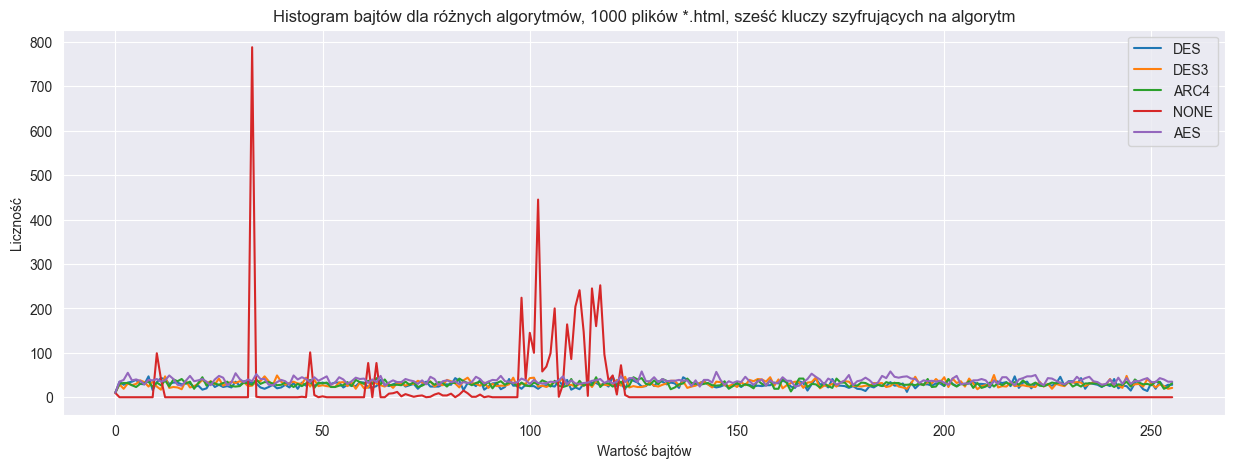

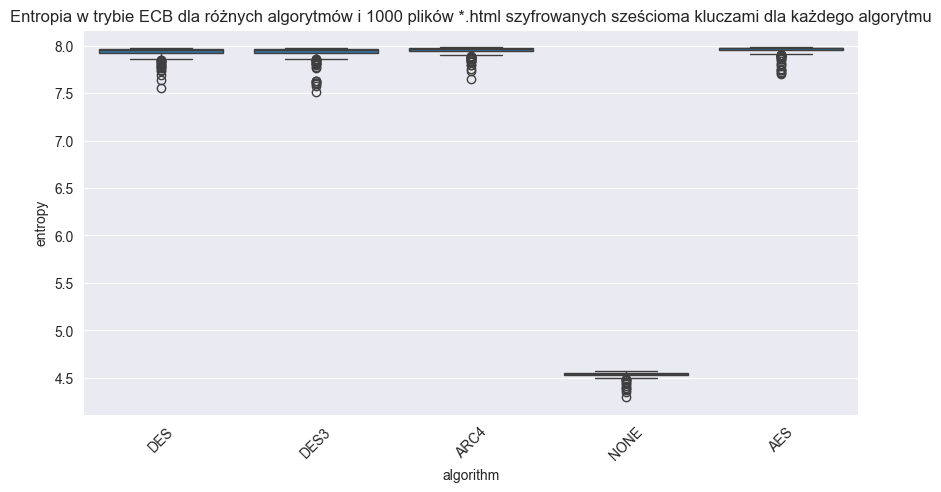

In [69]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_html_ecb_1000_6keys["algorithm"].unique()):
    subset = df_html_ecb_1000_6keys[df_html_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.html, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_html_ecb_1000_6keys["algorithm"], y=df_html_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.html szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [20]:
df_pyth_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_pyth_ecb.csv'))
df_pyth_ecb_1000_6keys

file_name    format   entropy        mean     variance    std_dev  \
0    file0380.py.enc  pyth_ecb  7.427339  131.950980  5093.458381  71.368469   
1    file0280.py.enc  pyth_ecb  7.801437  124.287118  5252.870620  72.476690   
2    file0292.py.enc  pyth_ecb  7.846442  126.219226  5575.681001  74.670483   
3    file0392.py.enc  pyth_ecb  7.834585  127.238326  5330.873056  73.012828   
4    file0302.py.enc  pyth_ecb  7.832990  127.515397  5385.908191  73.388747   
..               ...       ...       ...         ...          ...        ...   
995  file0075.py.enc  pyth_ecb  7.981205  127.427063  5454.231964  73.852772   
996  file0108.py.enc  pyth_ecb  7.959886  127.771462  5573.087157  74.653112   
997  file0008.py.enc  pyth_ecb  7.975916  127.166041  5457.563632  73.875325   
998  file0116.py.enc  pyth_ecb  7.916905  126.385268  5323.211837  72.960344   
999  file0016.py.enc  pyth_ecb  7.929830  127.115196  5169.658298  71.900336   

     skewness  kurtosis   energy        rms  ...  histogram_247  \
0   -0.043582 -1.118102    42388  10.192750  ...              4   
1    0.079476 -1.180083   195202  10.322369  ...              6   
2    0.008593 -1.246672   648508  10.142606  ...             19   
3    0.039363 -1.187900  1036691  10.348728  ...             59   
4    0.049320 -1.194034   515730  10.221712  ...             34   
..        ...       ...      ...        ...  ...            ...   
995 -0.004951 -1.196017   876062  10.251527  ...             45   
996 -0.011793 -1.229998   449823  10.300016  ...             20   
997  0.007723 -1.200754   783308  10.249751  ...             23   
998  0.031217 -1.169448   234219  10.225559  ...              9   
999 -0.000710 -1.144340   261720  10.339815  ...              9   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0                2              2              0              0   
1                8              7              7              4   
2               23             19             21             22   
3               67             31             28             27   
4               39             19             19             17   
..             ...            ...            ...            ...   
995             43             29             26             24   
996             23             19             18             12   
997             25             35             34             28   
998             12             11              4              7   
999             13              8              8              8   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0                0              1              2              0        DES  
1                5              6              3              8        DES  
2               15             18             17             26        DES  
3               18             25             24             38        DES  
4                9             21             21             13        DES  
..             ...            ...            ...            ...        ...  
995             32             32             28             31        AES  
996             22             10             18             12        AES  
997             21             29             31             34        AES  
998              5             12              6              7        AES  
999              2              8              6              7        AES  

[1000 rows x 267 columns]

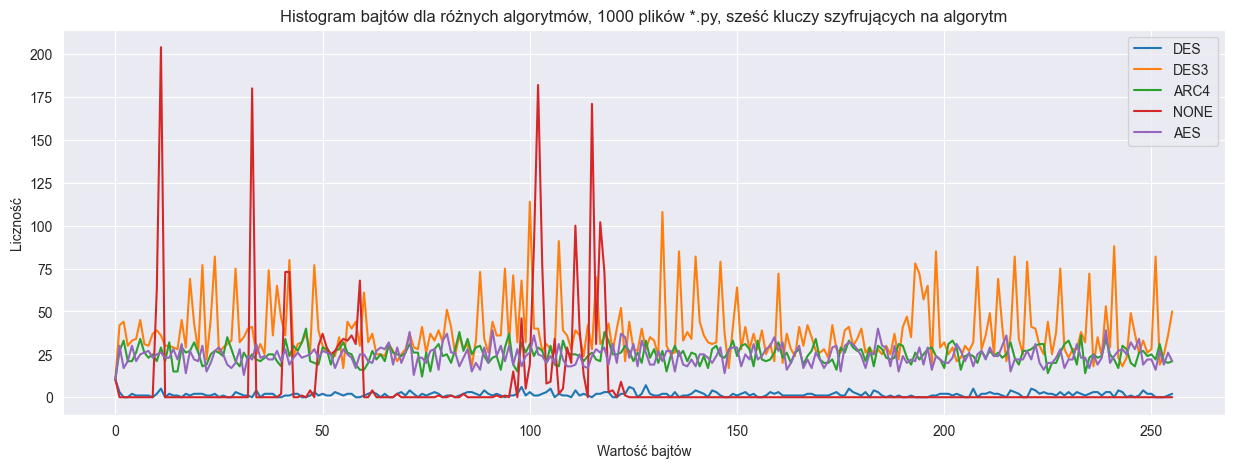

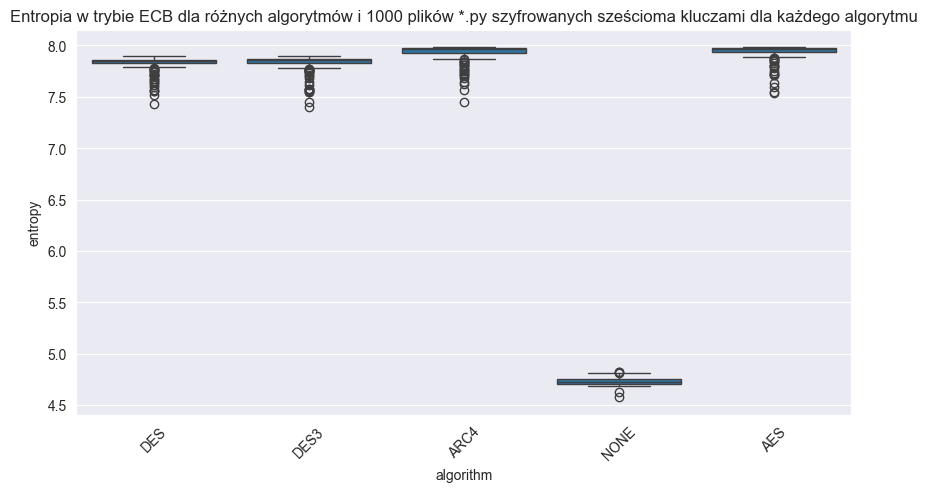

In [71]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_pyth_ecb_1000_6keys["algorithm"].unique()):
    subset = df_pyth_ecb_1000_6keys[df_pyth_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.py, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_pyth_ecb_1000_6keys["algorithm"], y=df_pyth_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.py szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [21]:
df_txt_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_txt_ecb.csv'))
df_txt_ecb_1000_6keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0298.txt.enc  txt_ecb  7.938249  125.651055  5532.370982  74.379910   
1    file0288.txt.enc  txt_ecb  7.977318  127.158898  5382.482852  73.365406   
2    file0221.txt.enc  txt_ecb  7.973329  126.214839  5485.258661  74.062532   
3    file0359.txt.enc  txt_ecb  7.968524  127.645380  5596.918742  74.812557   
4    file0231.txt.enc  txt_ecb  7.923853  126.997350  5483.316247  74.049418   
..                ...      ...       ...         ...          ...        ...   
995  file0048.txt.enc  txt_ecb  7.863426  128.342262  5454.976607  73.857813   
996  file0120.txt.enc  txt_ecb  7.808239  129.854508  5600.265717  74.834923   
997  file0058.txt.enc  txt_ecb  7.927616  126.150000  5558.683214  74.556577   
998  file0189.txt.enc  txt_ecb  7.951636  127.502575  5459.982671  73.891696   
999  file0199.txt.enc  txt_ecb  7.958333  127.729579  5561.816930  74.577590   

     skewness  kurtosis  energy        rms  ...  histogram_247  histogram_248  \
0    0.037181 -1.206967  314462  10.184026  ...              8             13   
1    0.006538 -1.174507  844127  10.256718  ...             34             28   
2    0.014028 -1.197820  763666  10.281651  ...             19             24   
3    0.011897 -1.241909  620806  10.268194  ...             32             24   
4   -0.032355 -1.227326  235768  10.204793  ...              6              7   
..        ...       ...     ...        ...  ...            ...            ...   
995  0.018190 -1.200863  141374  10.256168  ...              7              6   
996 -0.035848 -1.205525   99872  10.115724  ...              1              4   
997  0.024904 -1.216576  290440  10.184722  ...              6              8   
998 -0.000756 -1.188618  446615  10.224711  ...             19             13   
999 -0.000020 -1.217505  508747  10.244001  ...             13             24   

     histogram_249  histogram_250  histogram_251  histogram_252  \
0               11             10              8             13   
1               28             19             29             26   
2               25             25             30             28   
3               26             26             21             25   
4                9              5              6             12   
..             ...            ...            ...            ...   
995              3              3              7              4   
996              5              4              6              7   
997             11             14             16              8   
998             13              8             25             16   
999             13             26             30             14   

     histogram_253  histogram_254  histogram_255  algorithm  
0               22             10             12        DES  
1               35             30             41        DES  
2               30             30             35        DES  
3               28             24             26        DES  
4                9              3              7        DES  
..             ...            ...            ...        ...  
995              4              7             10        AES  
996              5              7              2        AES  
997              8             13             12        AES  
998             17             14             19        AES  
999             22             17             23        AES  

[1000 rows x 267 columns]

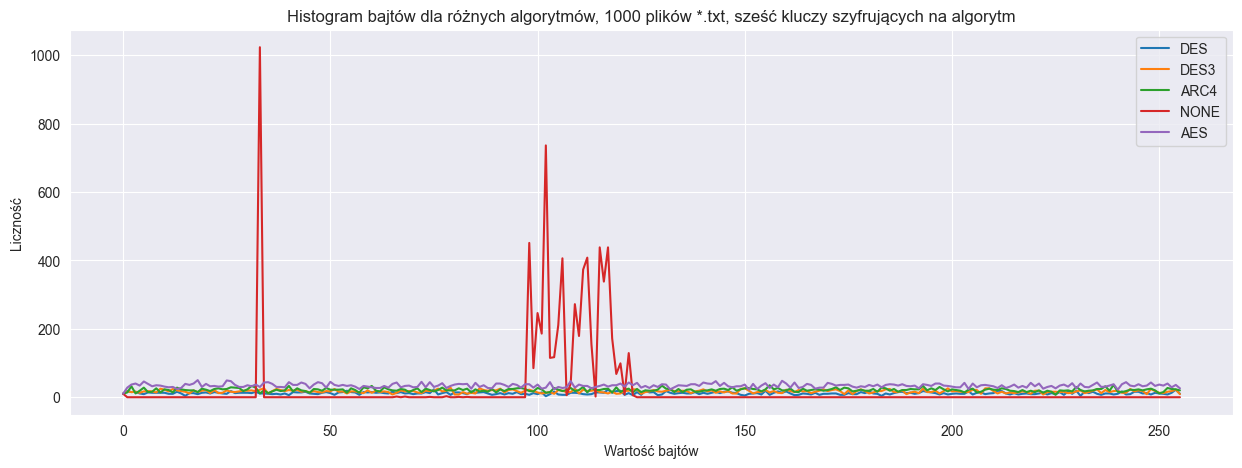

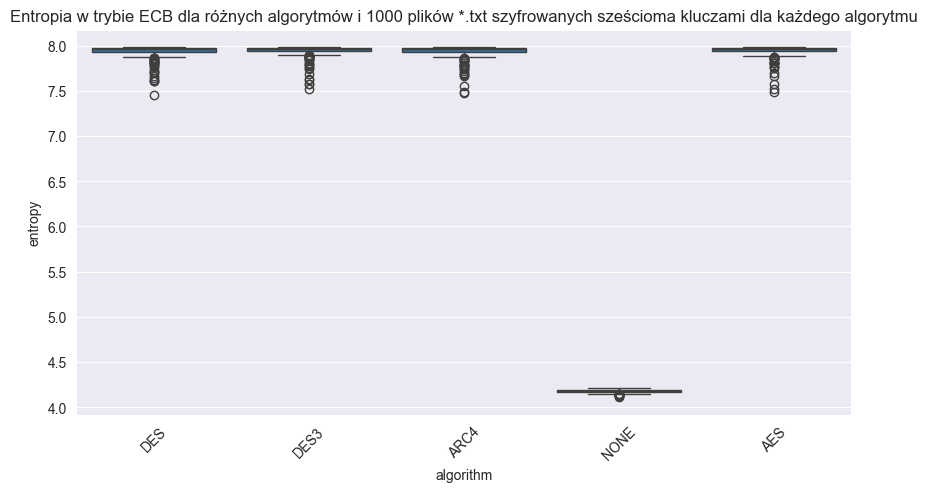

In [73]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_txt_ecb_1000_6keys["algorithm"].unique()):
    subset = df_txt_ecb_1000_6keys[df_txt_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.txt, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_txt_ecb_1000_6keys["algorithm"], y=df_txt_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.txt szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()

In [22]:
df_wav_ecb_1000_6keys = pd.DataFrame(pd.read_csv(
    '../features_ecb/features_ecb_1000/features_ecb_1000_6keys_csv/features_wav_ecb.csv'))
df_wav_ecb_1000_6keys

file_name   format   entropy        mean     variance    std_dev  \
0    file0214.wav.enc  wav_ecb  7.998005  127.436230  5448.548239  73.814282   
1    file0204.wav.enc  wav_ecb  7.997822  127.233637  5436.175674  73.730426   
2    file0276.wav.enc  wav_ecb  7.997756  127.088732  5435.344703  73.724790   
3    file0266.wav.enc  wav_ecb  7.997942  127.462964  5447.479733  73.807044   
4    file0353.wav.enc  wav_ecb  7.997684  127.202633  5468.167692  73.947060   
..                ...      ...       ...         ...          ...        ...   
995  file0052.wav.enc  wav_ecb  7.998695  127.808533  5469.601939  73.956757   
996  file0167.wav.enc  wav_ecb  7.999044  127.195140  5459.573738  73.888928   
997  file0177.wav.enc  wav_ecb  7.998930  127.698409  5456.636447  73.869049   
998  file0105.wav.enc  wav_ecb  7.998917  127.156069  5468.176574  73.947120   
999  file0115.wav.enc  wav_ecb  7.999048  127.439356  5453.879365  73.850385   

     skewness  kurtosis    energy        rms  ...  histogram_247  \
0   -0.002378 -1.198640  37045561  10.246470  ...           1396   
1    0.003070 -1.195413   9305380  10.268680  ...            336   
2    0.010605 -1.195669  46424145  10.259567  ...           1735   
3   -0.001865 -1.192344  18474545  10.232423  ...            644   
4    0.006425 -1.203845   9335578  10.285329  ...            325   
..        ...       ...       ...        ...  ...            ...   
995 -0.002527 -1.206068  27997121  10.285273  ...           1053   
996  0.007392 -1.199911  18621874  10.273143  ...            712   
997 -0.003575 -1.200917  27898368  10.267117  ...           1068   
998  0.006169 -1.202498  18647962  10.280336  ...            717   
999  0.003011 -1.197586  37255766  10.275499  ...           1418   

     histogram_248  histogram_249  histogram_250  histogram_251  \
0             1348           1360           1420           1440   
1              352            336            313            356   
2             1649           1779           1711           1810   
3              590            714            710            716   
4              362            326            371            353   
..             ...            ...            ...            ...   
995           1091            995            981            982   
996            715            680            694            678   
997            955            983           1062           1081   
998            716            733            629            670   
999           1415           1344           1360           1360   

     histogram_252  histogram_253  histogram_254  histogram_255  algorithm  
0             1240           1236           1240           1396        DES  
1              347            309            354            353        DES  
2             1745           1815           1685           1605        DES  
3              758            668            720            726        DES  
4              346            328            313            368        DES  
..             ...            ...            ...            ...        ...  
995           1080           1024           1057           1092        AES  
996            714            660            664            675        AES  
997           1048           1052           1067            996        AES  
998            683            641            652            677        AES  
999           1429           1381           1502           1356        AES  

[1000 rows x 267 columns]

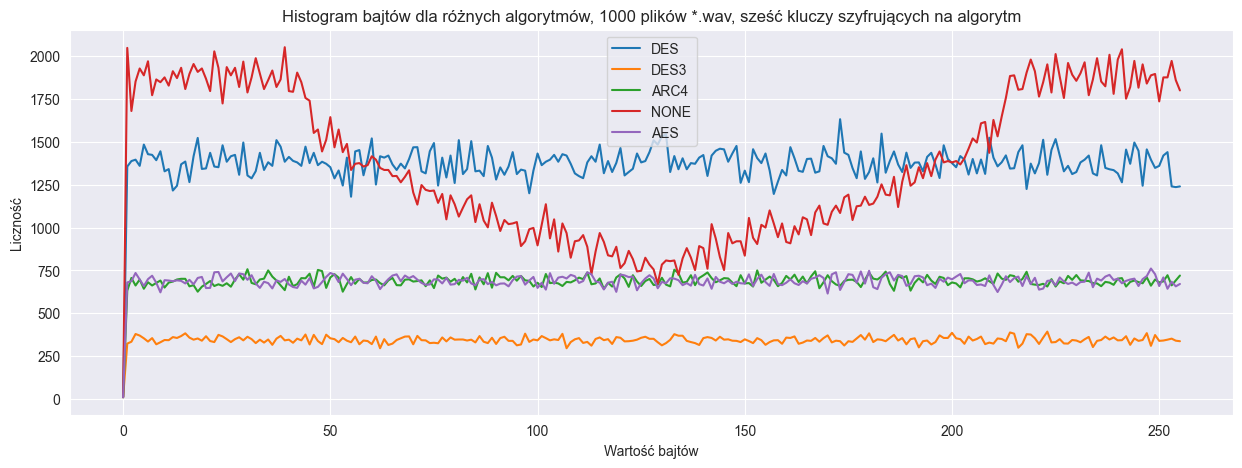

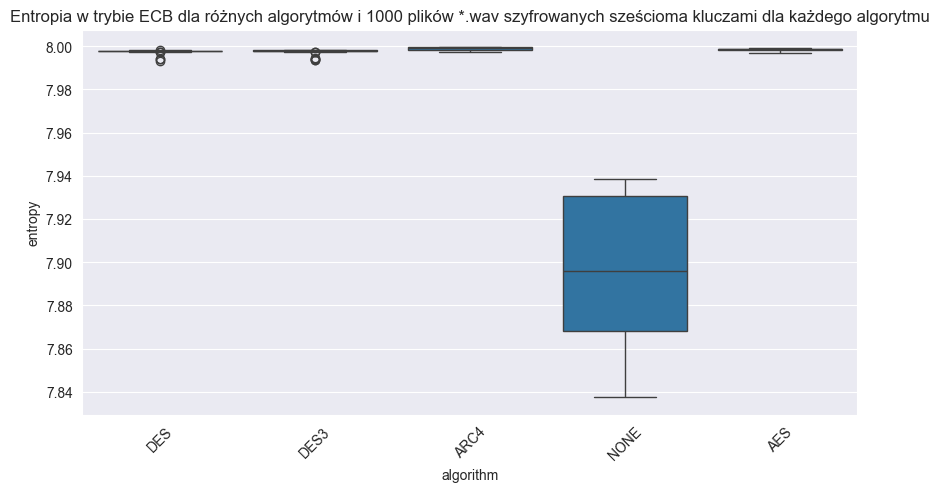

In [75]:
plt.figure(figsize=(15, 5))
for i, algo in enumerate(df_wav_ecb_1000_6keys["algorithm"].unique()):
    subset = df_wav_ecb_1000_6keys[df_wav_ecb_1000_6keys["algorithm"] == algo].iloc[0, 9:265]  # Kolumny histogramu
    plt.plot(range(256), subset, label=algo)

plt.legend()
plt.title("Histogram bajtów dla różnych algorytmów, 1000 plików *.wav, sześć kluczy szyfrujących na algorytm")
plt.xlabel("Wartość bajtów")
plt.ylabel("Liczność")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_wav_ecb_1000_6keys["algorithm"], y=df_wav_ecb_1000_6keys["entropy"])
plt.xticks(rotation=45)
plt.title("Entropia w trybie ECB dla różnych algorytmów i 1000 plików *.wav szyfrowanych sześcioma kluczami dla każdego algorytmu")
plt.show()